In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import pandas as pd
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import cm
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import datetime
import wordcloud
import json

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

warnings.filterwarnings('ignore')

In [3]:
PLOT_COLORS = ["#268bd2", "#0052CC", "#FF5722", "#b58900", "#003f5c"]
pd.options.display.float_format = '{:.2f}'.format
sns.set(style="ticks")
plt.rc('figure', figsize=(8, 5), dpi=100)
plt.rc('axes', labelpad=20, facecolor="#ffffff", linewidth=0.4, grid=True, labelsize=14)
plt.rc('patch', linewidth=0)
plt.rc('xtick.major', width=0.2)
plt.rc('ytick.major', width=0.2)
plt.rc('grid', color='#9E9E9E', linewidth=0.4)
plt.rc('font', family='Arial', weight='400', size=10)
plt.rc('text', color='#282828')
plt.rc('savefig', pad_inches=0.3, dpi=300)

In [4]:
df = pd.read_csv("/home/sleepynav/Documents/Social Web/Youtube-Trending/Data/GBvideos.csv", index_col='video_id')

with open("/home/sleepynav/Documents/Social Web/Youtube-Trending/Data/GB_category_id.json") as f:
    categories = json.load(f)["items"]
cat_dict = {}
counts_titles = {}

for cat in categories:
    cat_dict[int(cat["id"])] = cat["snippet"]["title"]
df['category_name'] = df['category_id'].map(cat_dict)

In [5]:
df.head(2)

trending_date                                          title  \
video_id                                                                   
Jw1Y-zhQURU      17.14.11  John Lewis Christmas Ad 2017 - #MozTheMonster   
3s1rvMFUweQ      17.14.11      Taylor Swift: …Ready for It? (Live) - SNL   

                   channel_title  category_id              publish_time  \
video_id                                                                  
Jw1Y-zhQURU           John Lewis           26  2017-11-10T07:38:29.000Z   
3s1rvMFUweQ  Saturday Night Live           24  2017-11-12T06:24:44.000Z   

                                                          tags    views  \
video_id                                                                  
Jw1Y-zhQURU  christmas|"john lewis christmas"|"john lewis"|...  7224515   
3s1rvMFUweQ  SNL|"Saturday Night Live"|"SNL Season 43"|"Epi...  1053632   

             likes  dislikes  comment_count  \
video_id                                      
Jw1Y-zhQURU  55681     10247           9479   
3s1rvMFUweQ  25561      2294           2757   

                                             thumbnail_link  \
video_id                                                      
Jw1Y-zhQURU  https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg   
3s1rvMFUweQ  https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg   

             comments_disabled  ratings_disabled  video_error_or_removed  \
video_id                                                                   
Jw1Y-zhQURU              False             False                   False   
3s1rvMFUweQ              False             False                   False   

                                                   description  category_name  
video_id                                                                       
Jw1Y-zhQURU  Click here to continue the story and make your...  Howto & Style  
3s1rvMFUweQ  Musical guest Taylor Swift performs …Ready for...  Entertainment

In [6]:
cat_dict

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38916 entries, Jw1Y-zhQURU to 4YFo4bdMO8Q
Data columns (total 16 columns):
trending_date             38916 non-null object
title                     38916 non-null object
channel_title             38916 non-null object
category_id               38916 non-null int64
publish_time              38916 non-null object
tags                      38916 non-null object
views                     38916 non-null int64
likes                     38916 non-null int64
dislikes                  38916 non-null int64
comment_count             38916 non-null int64
thumbnail_link            38916 non-null object
comments_disabled         38916 non-null bool
ratings_disabled          38916 non-null bool
video_error_or_removed    38916 non-null bool
description               38304 non-null object
category_name             38826 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.3+ MB


In [8]:
df[df["description"].apply(lambda x: pd.isnull(x))].head(1)

trending_date              title  channel_title  category_id  \
video_id                                                                   
_wM_jY_rass      17.14.11  Bone on Labour HQ  Ross Kempsell           25   

                         publish_time    tags   views  likes  dislikes  \
video_id                                                                 
_wM_jY_rass  2017-11-06T16:12:58.000Z  [none]  159065   1160      1164   

             comment_count                                  thumbnail_link  \
video_id                                                                     
_wM_jY_rass              0  https://i.ytimg.com/vi/_wM_jY_rass/default.jpg   

             comments_disabled  ratings_disabled  video_error_or_removed  \
video_id                                                                   
_wM_jY_rass               True             False                   False   

            description    category_name  
video_id                                  
_wM_jY_rass         NaN  News & Politics

In [9]:
df["description"] = df["description"].fillna(value="")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38916 entries, Jw1Y-zhQURU to 4YFo4bdMO8Q
Data columns (total 16 columns):
trending_date             38916 non-null object
title                     38916 non-null object
channel_title             38916 non-null object
category_id               38916 non-null int64
publish_time              38916 non-null object
tags                      38916 non-null object
views                     38916 non-null int64
likes                     38916 non-null int64
dislikes                  38916 non-null int64
comment_count             38916 non-null int64
thumbnail_link            38916 non-null object
comments_disabled         38916 non-null bool
ratings_disabled          38916 non-null bool
video_error_or_removed    38916 non-null bool
description               38916 non-null object
category_name             38826 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.3+ MB


In [10]:
df[df["category_name"].apply(lambda x: pd.isnull(x))].head(1)

trending_date                                              title  \
video_id                                                                       
CYebJBcLZHA      17.22.12  In Disaster There is Opportunity - Finding a P...   

            channel_title  category_id              publish_time  \
video_id                                                           
CYebJBcLZHA    TEDx Talks           29  2017-12-19T15:56:46.000Z   

                                                          tags  views  likes  \
video_id                                                                       
CYebJBcLZHA  TEDxTalks|"English"|"Life"|"Achievement"|"Adve...  19270   1344   

             dislikes  comment_count  \
video_id                               
CYebJBcLZHA         5             95   

                                             thumbnail_link  \
video_id                                                      
CYebJBcLZHA  https://i.ytimg.com/vi/CYebJBcLZHA/default.jpg   

             comments_disabled  ratings_disabled  video_error_or_removed  \
video_id                                                                   
CYebJBcLZHA              False             False                   False   

                                                   description category_name  
video_id                                                                      
CYebJBcLZHA  Martyn explains the unbelievable challenge pre...           NaN

In [11]:
df["category_name"] = df["category_name"].fillna(value="")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38916 entries, Jw1Y-zhQURU to 4YFo4bdMO8Q
Data columns (total 16 columns):
trending_date             38916 non-null object
title                     38916 non-null object
channel_title             38916 non-null object
category_id               38916 non-null int64
publish_time              38916 non-null object
tags                      38916 non-null object
views                     38916 non-null int64
likes                     38916 non-null int64
dislikes                  38916 non-null int64
comment_count             38916 non-null int64
thumbnail_link            38916 non-null object
comments_disabled         38916 non-null bool
ratings_disabled          38916 non-null bool
video_error_or_removed    38916 non-null bool
description               38916 non-null object
category_name             38916 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.3+ MB


In [12]:
df[['category_id', 'category_name']].head(2)

category_id  category_name
video_id                               
Jw1Y-zhQURU           26  Howto & Style
3s1rvMFUweQ           24  Entertainment

In [13]:
category_count = df['category_name'].value_counts() # frequency for each category
category_count

Music                   13754
Entertainment            9124
People & Blogs           2926
Film & Animation         2577
Howto & Style            1928
Sports                   1907
Comedy                   1828
Gaming                   1788
News & Politics          1225
Pets & Animals            534
Science & Technology      518
Education                 457
Autos & Vehicles          144
Travel & Events            96
                           90
Shows                      20
Name: category_name, dtype: int64

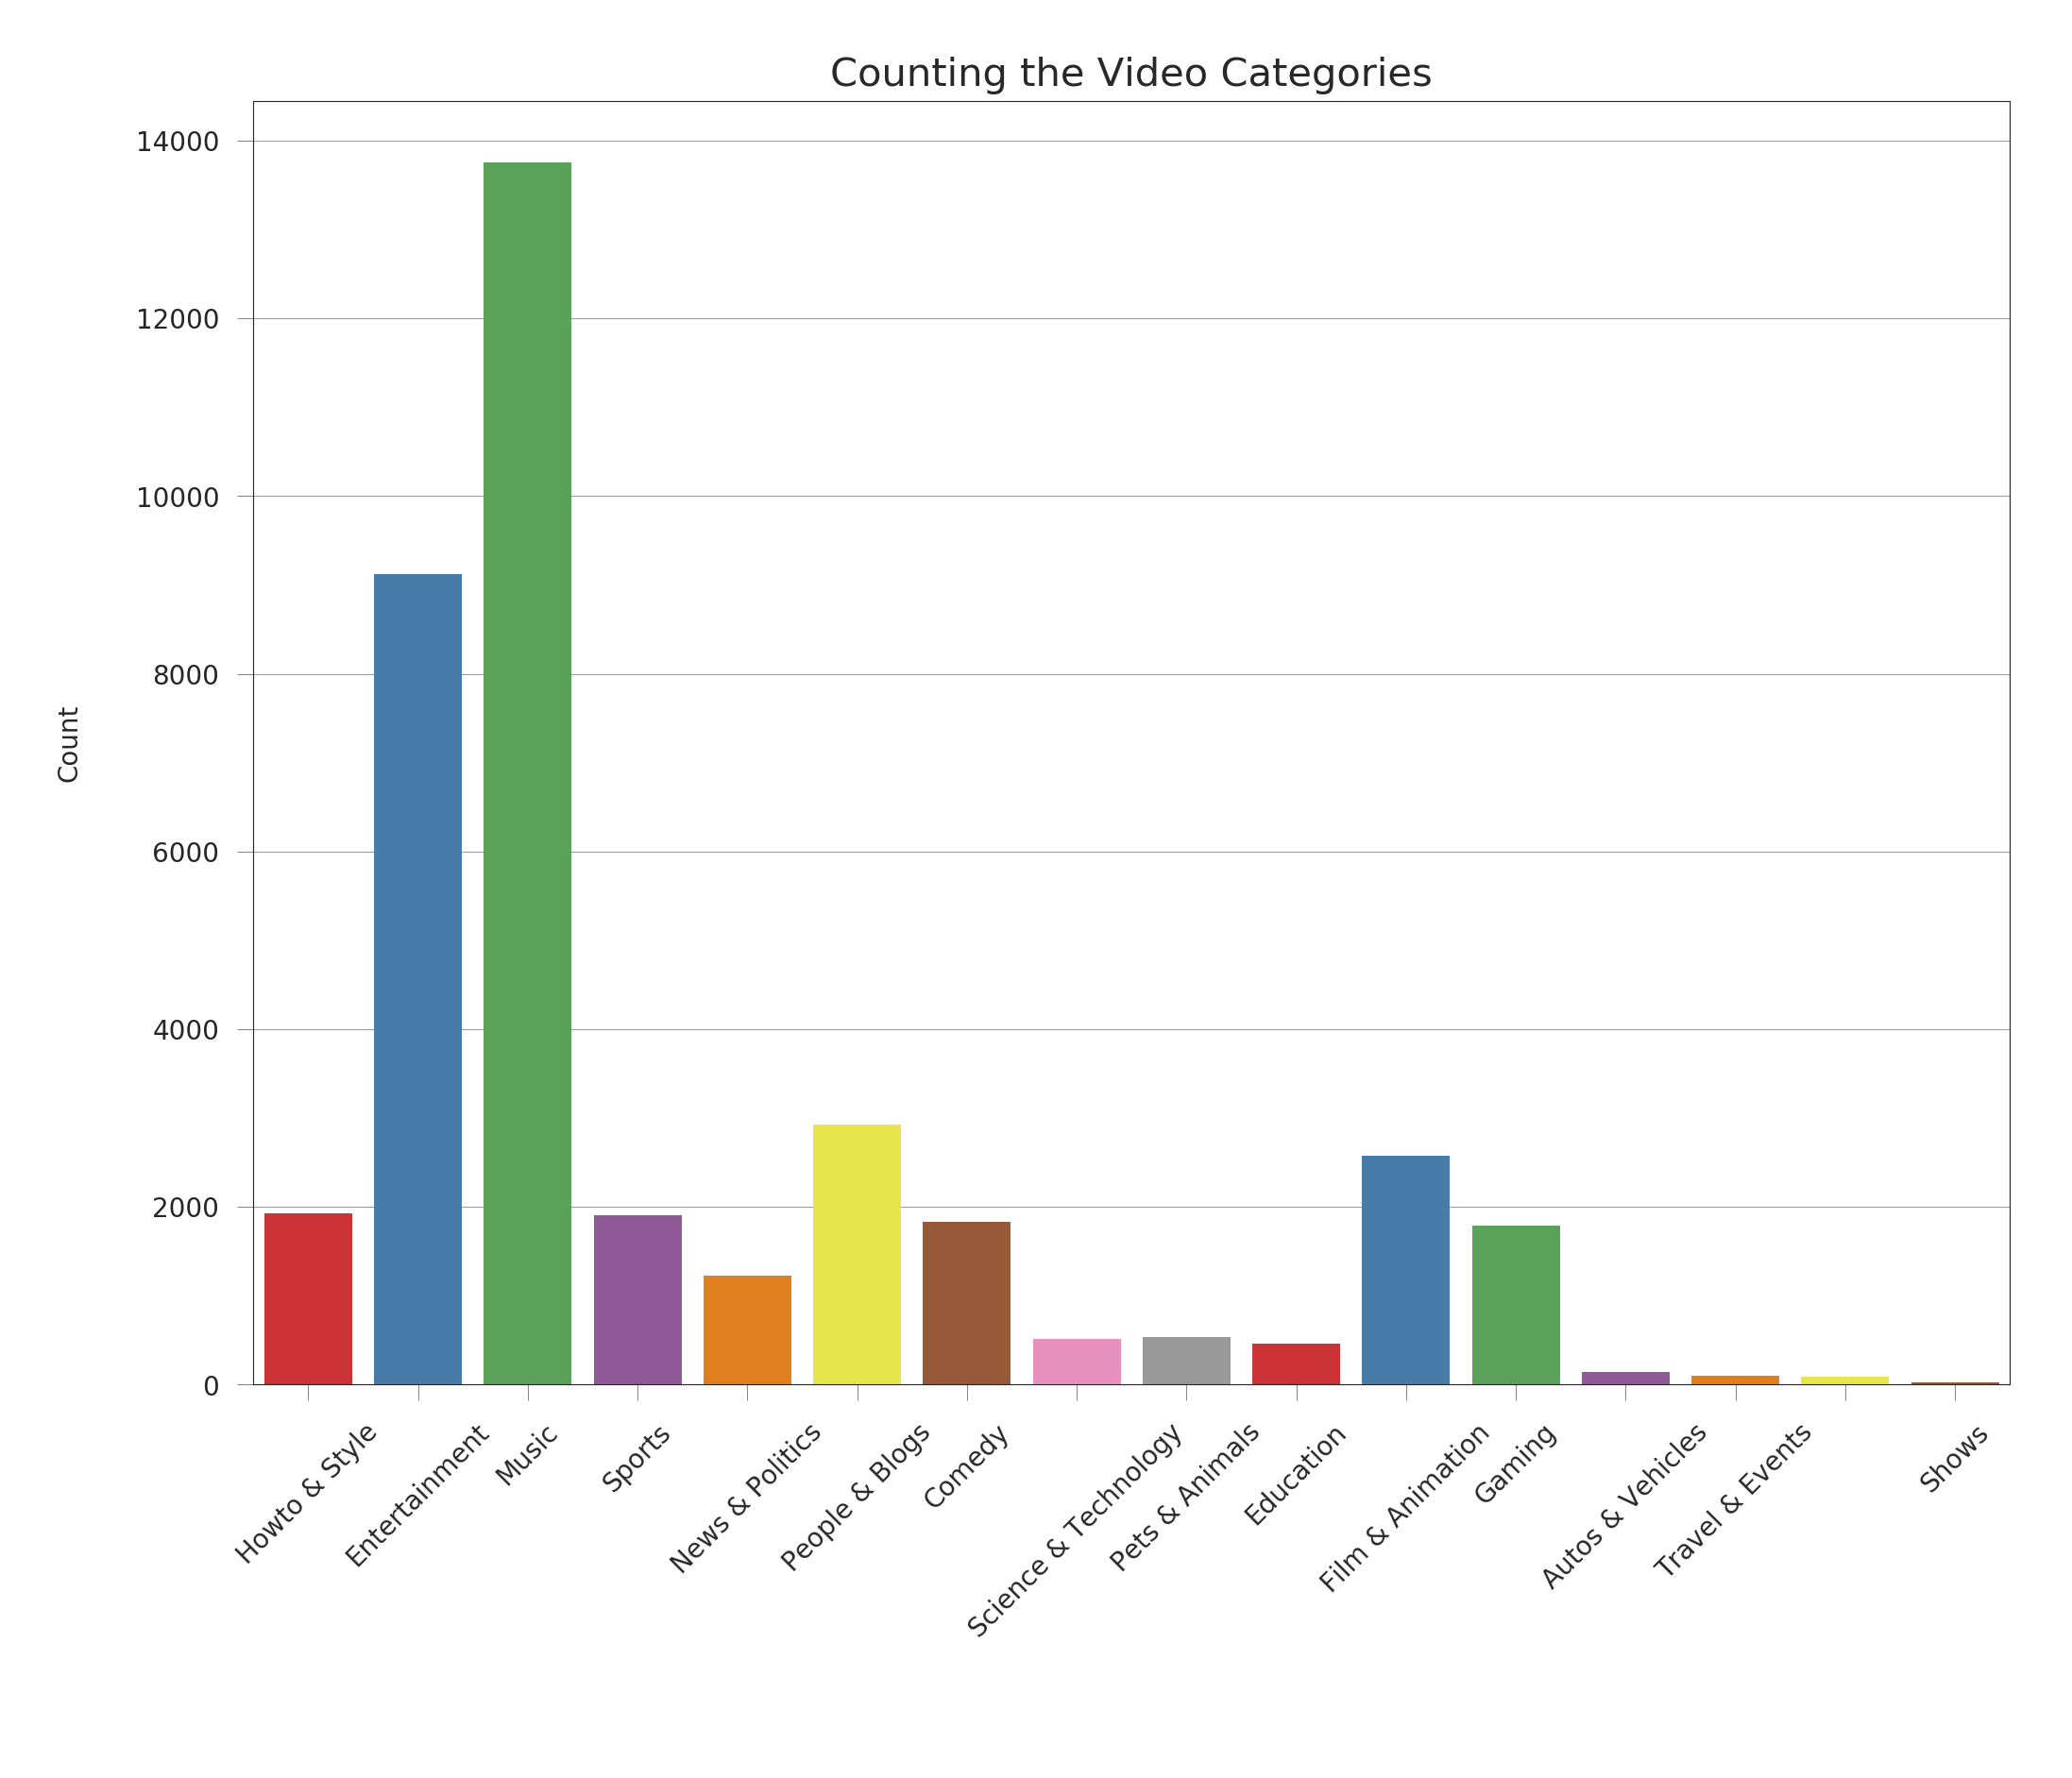

In [14]:
plt.figure(figsize = (12,9))

g = sns.countplot('category_name', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Categories", fontsize=15)
g.set_xlabel(" ", fontsize=10)
g.set_ylabel("Count", fontsize=10);

In [15]:
df['trending_date'] = pd.to_datetime(df['trending_date'], format='%y.%d.%m')
df['trending_date'].head()

video_id
Jw1Y-zhQURU   2017-11-14
3s1rvMFUweQ   2017-11-14
n1WpP7iowLc   2017-11-14
PUTEiSjKwJU   2017-11-14
rHwDegptbI4   2017-11-14
Name: trending_date, dtype: datetime64[ns]

In [16]:
df['publish_time'] = pd.to_datetime(df['publish_time'], format='%Y-%m-%dT%H:%M:%S.%fZ')
df['publish_time'].head()

video_id
Jw1Y-zhQURU   2017-11-10 07:38:29
3s1rvMFUweQ   2017-11-12 06:24:44
n1WpP7iowLc   2017-11-10 17:00:03
PUTEiSjKwJU   2017-11-13 02:30:38
rHwDegptbI4   2017-11-13 01:45:13
Name: publish_time, dtype: datetime64[ns]

In [17]:
type_int_list = ['views', 'likes', 'dislikes', 'comment_count']
for column in type_int_list:
    df[column] = df[column].astype(int)

type_str_list = ['category_id']
for column in type_str_list:
    df[column] = df[column].astype(str)

In [18]:
df.describe()

views      likes   dislikes  comment_count
count     38916.00   38916.00   38916.00       38916.00
mean    5911943.63  134519.55    7612.56       13088.35
std    19001209.95  349989.31   50956.83       50667.40
min         851.00       0.00       0.00           0.00
25%      251527.25    5897.00     200.00         679.00
50%      981889.00   25182.50     821.00        2478.00
75%     3683628.50  114089.25    3357.50        9241.50
max   424538912.00 5613827.00 1944971.00     1626501.00

In [19]:
keep_columns = ['views', 'likes', 'dislikes', 'comment_count'] 
corr_matrix = df[keep_columns].corr()
corr_matrix

views  likes  dislikes  comment_count
views           1.00   0.80      0.39           0.47
likes           0.80   1.00      0.45           0.74
dislikes        0.39   0.45      1.00           0.77
comment_count   0.47   0.74      0.77           1.00

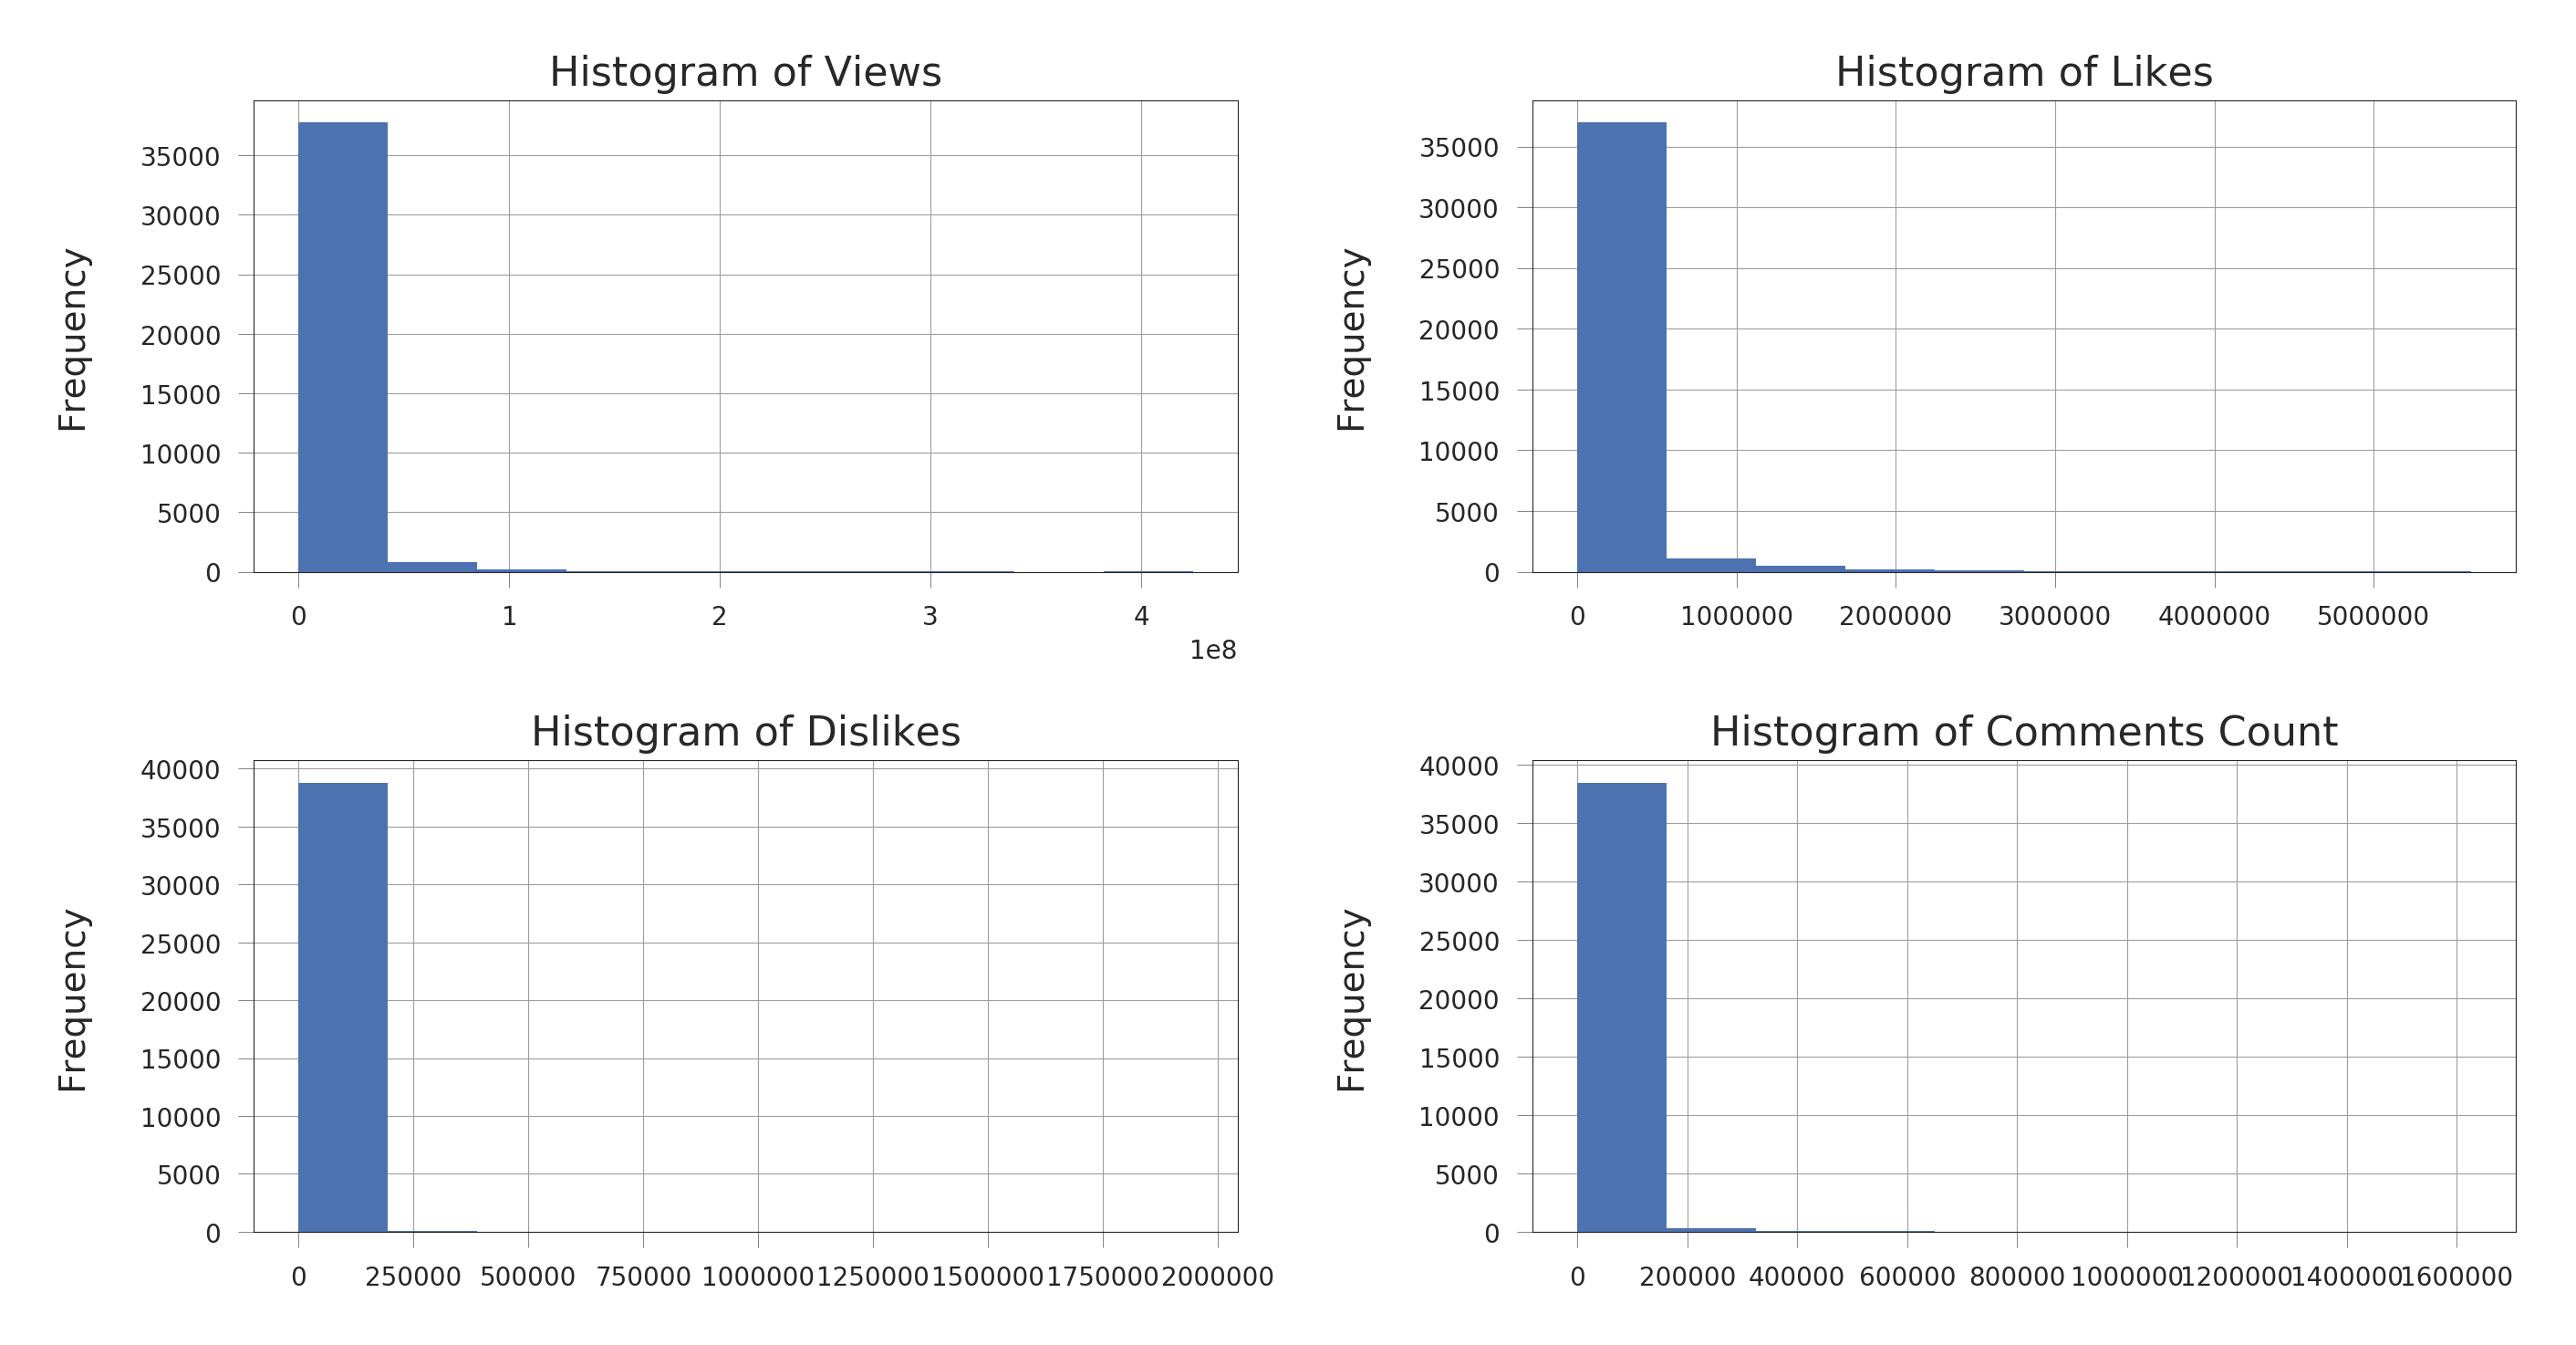

In [20]:
plt.figure(figsize = (16,8))

plt.subplot(221)
h1=df['views'].plot.hist()
h1.set_title("Histogram of Views", fontsize=16)

plt.subplot(222)
h2=df['likes'].plot.hist()
h2.set_title("Histogram of Likes", fontsize=16)

plt.subplot(223)
h3=df['dislikes'].plot.hist()
h3.set_title("Histogram of Dislikes", fontsize=16)

plt.subplot(224)
h4=df['comment_count'].plot.hist()
h4.set_title("Histogram of Comments Count", fontsize=16)


plt.subplots_adjust(wspace = 0.3, hspace = 0.4,top = 0.9)
plt.show();

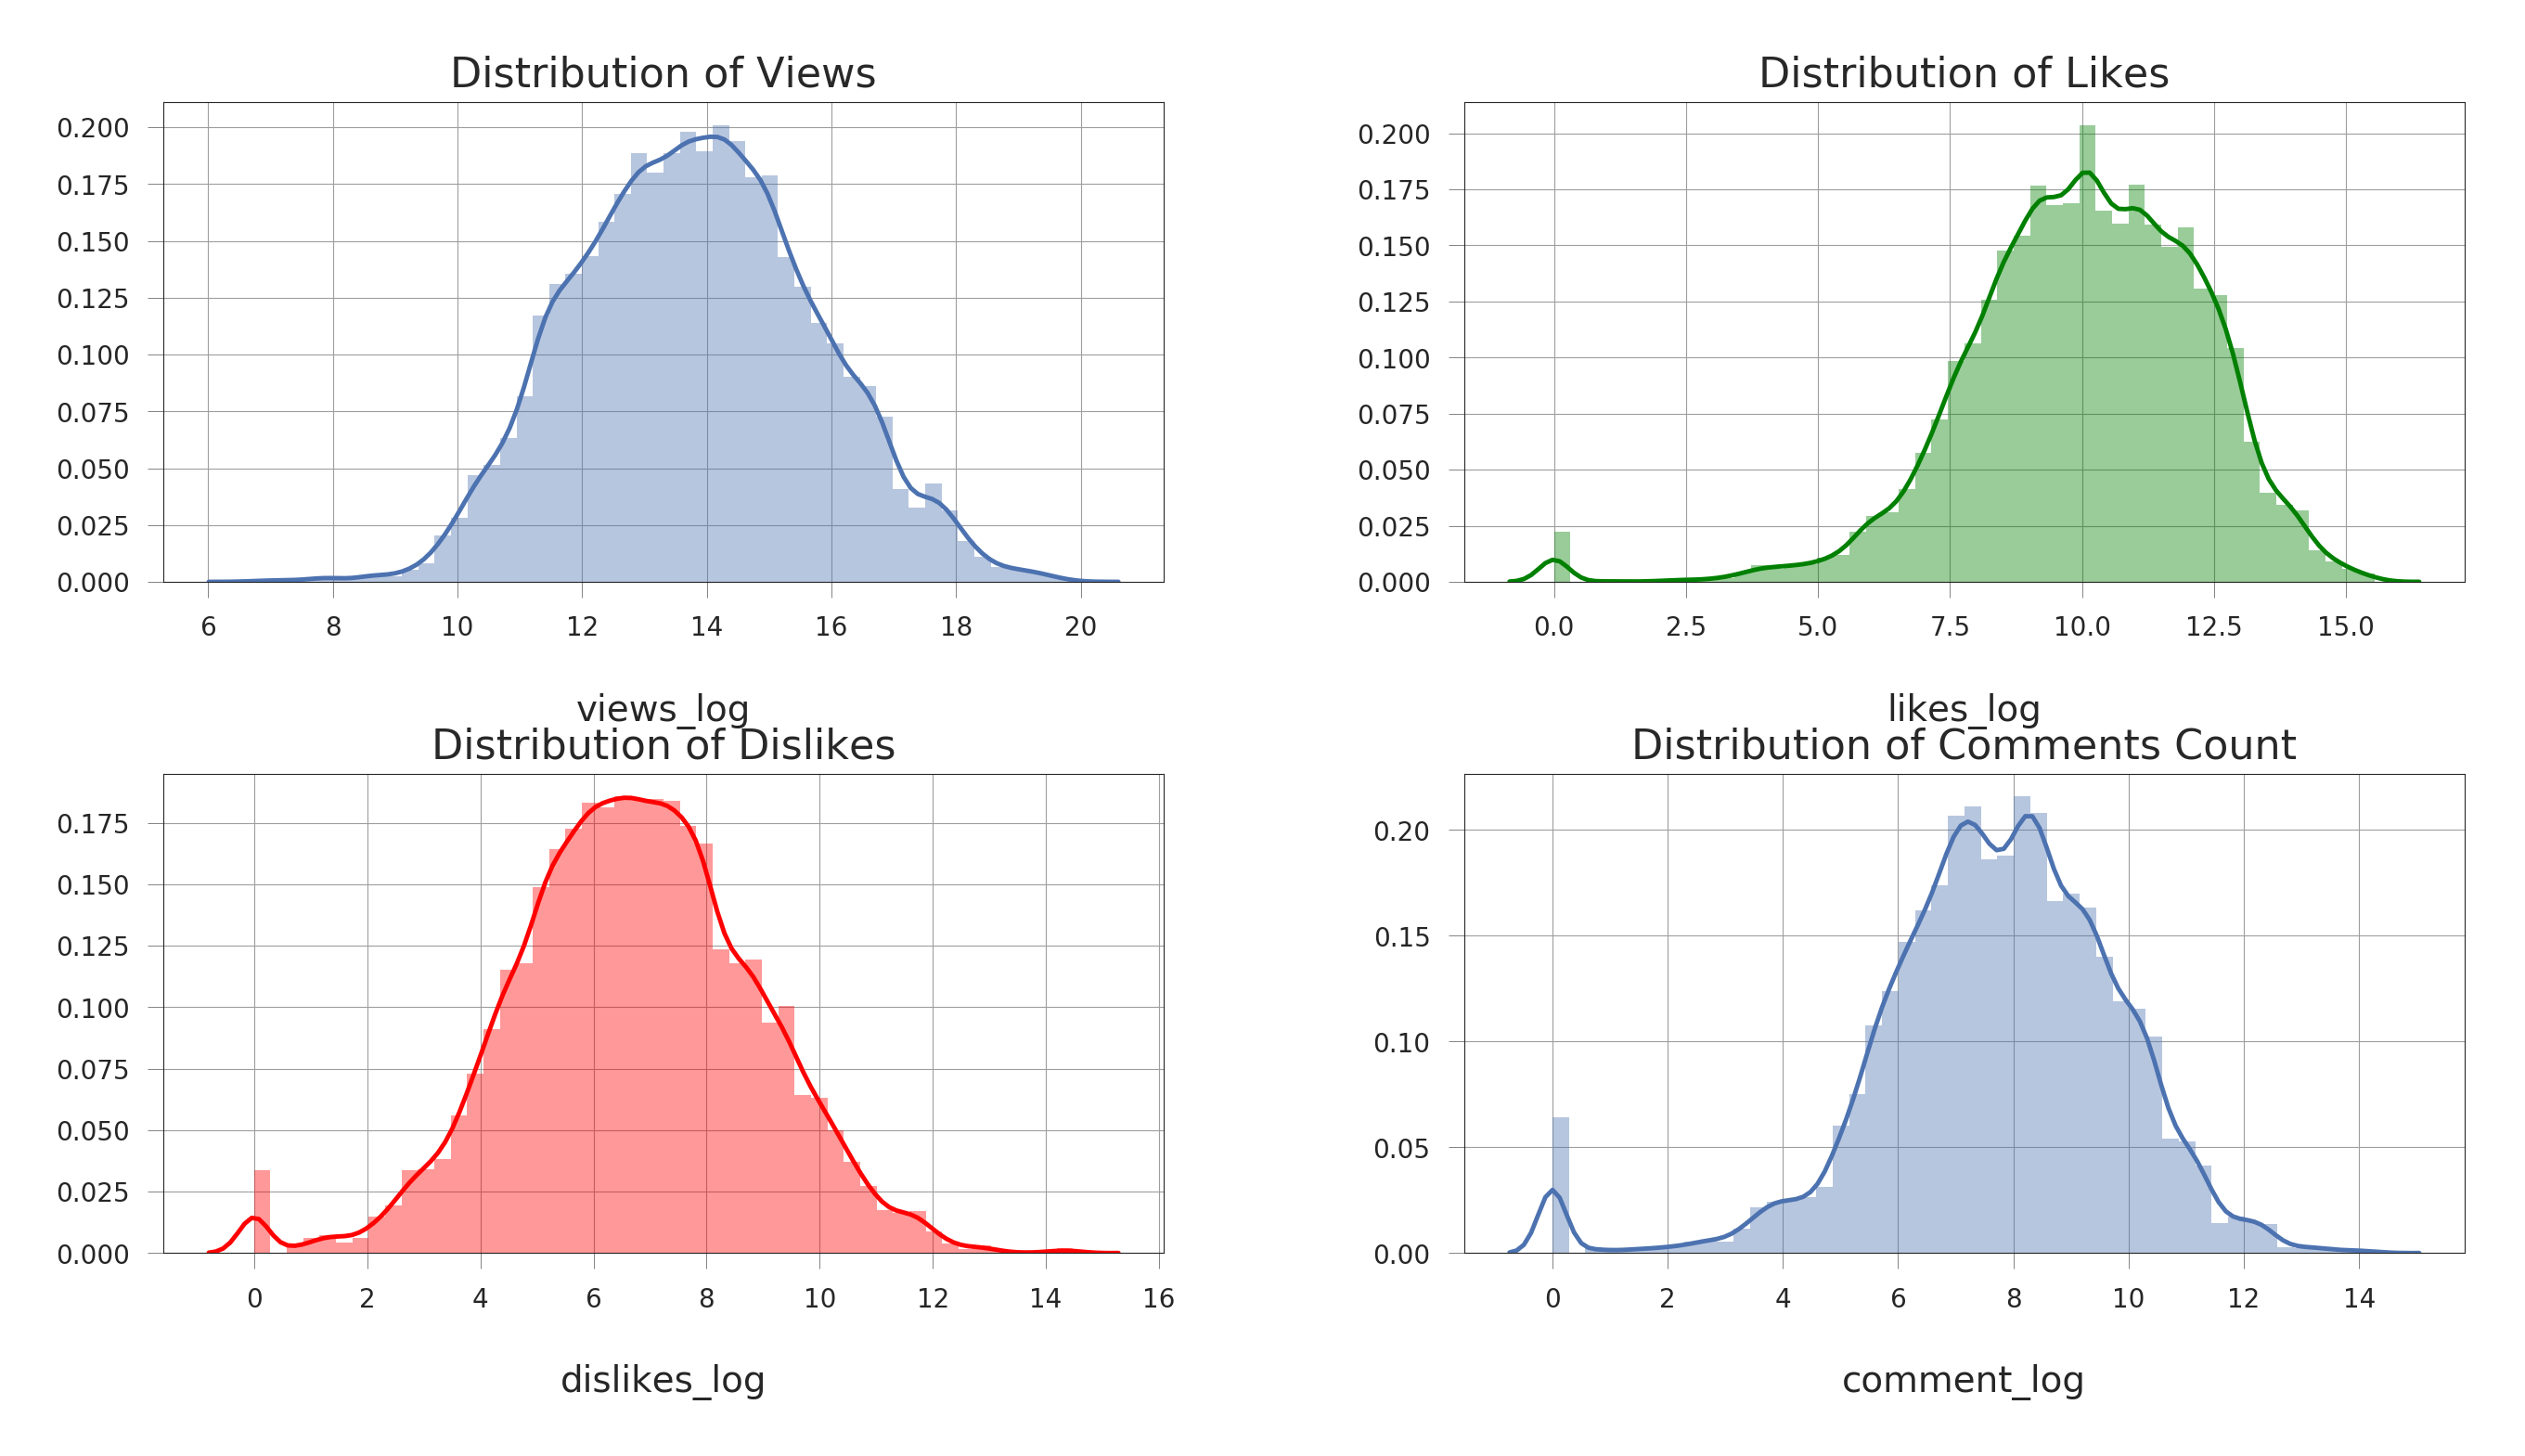

In [21]:
df['likes_log'] = np.log(df['likes'] + 1)
df['views_log'] = np.log(df['views'] + 1)
df['dislikes_log'] = np.log(df['dislikes'] + 1)
df['comment_log'] = np.log(df['comment_count'] + 1)

df['like_rate'] =  df['likes'] / df['views'] * 100
df['dislike_rate'] =  df['dislikes'] / df['views'] * 100
df['comment_rate'] =  df['comment_count'] / df['views'] * 100


plt.figure(figsize = (16,8))

plt.subplot(221)
l1 = sns.distplot(df['views_log'])
l1.set_title("Distribution of Views", fontsize=16)

plt.subplot(222)
l2 = sns.distplot(df['likes_log'],color='green')
l2.set_title('Distribution of Likes', fontsize=16)

plt.subplot(223)
l3 = sns.distplot(df['dislikes_log'], color='r')
l3.set_title("Distribution of Dislikes", fontsize=16)

plt.subplot(224)
l4 = sns.distplot(df['comment_log'])
l4.set_title("Distribution of Comments Count", fontsize=16)


plt.subplots_adjust(wspace = 0.3, hspace = 0.4,top = 0.9)
plt.show();

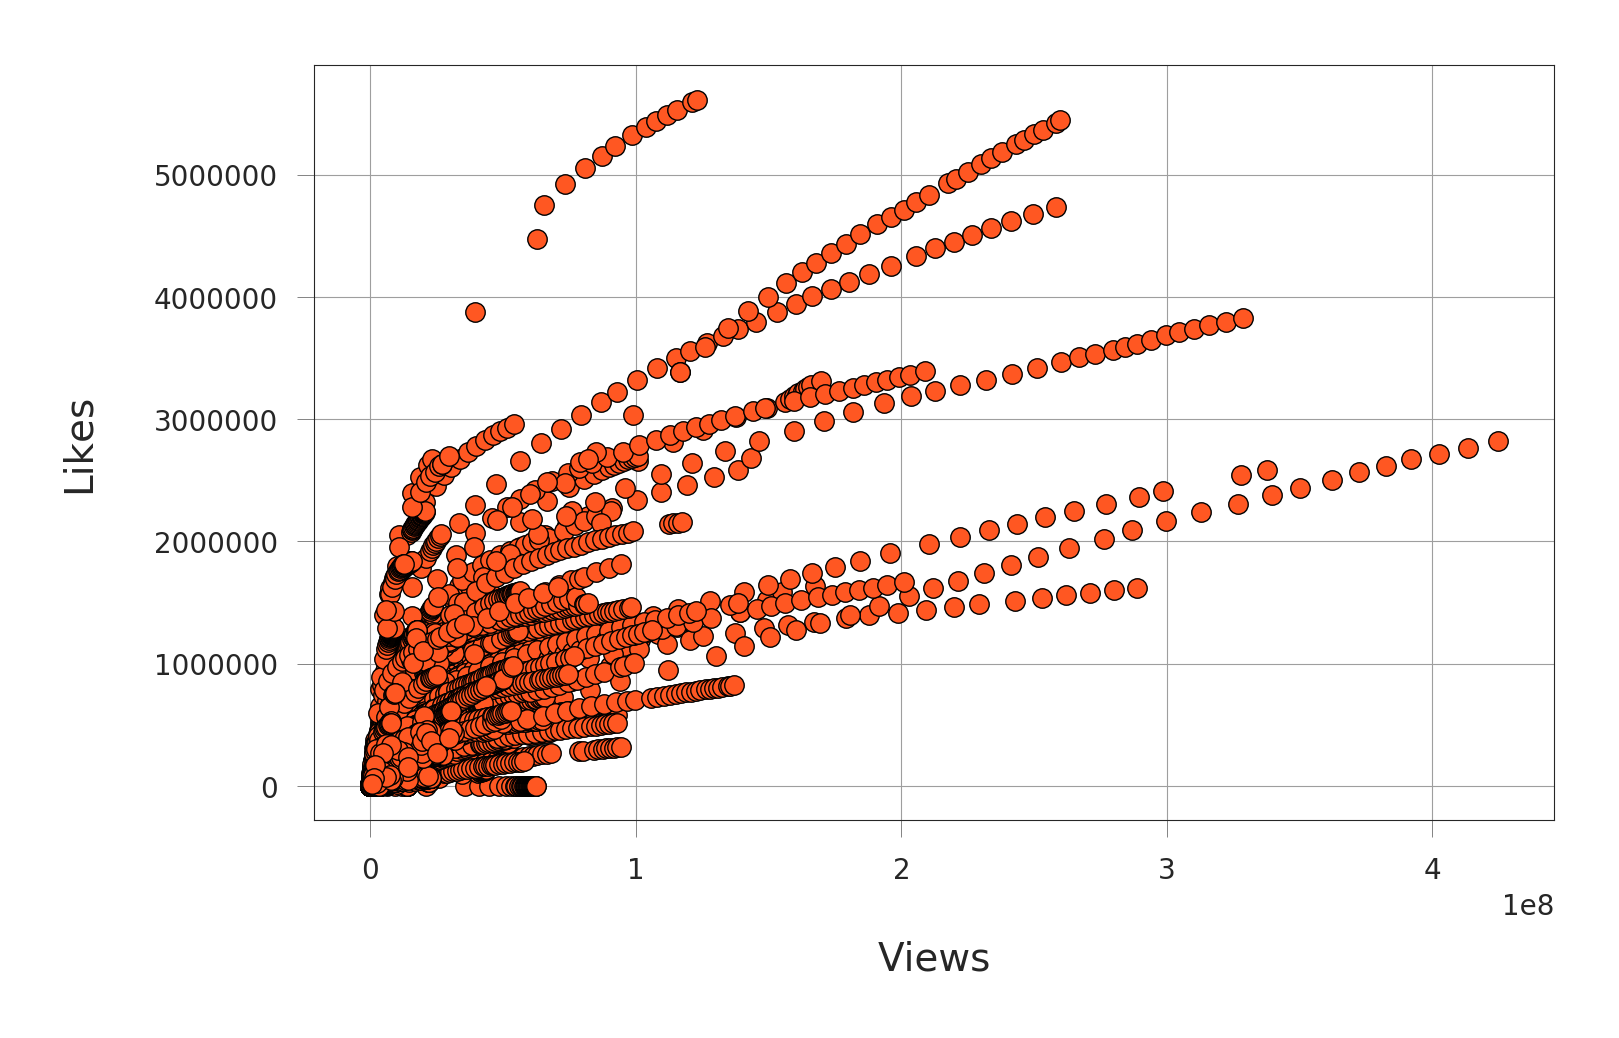

In [22]:
fig, ax = plt.subplots()
plt.scatter(x=df['views'], y=df['likes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="Likes");

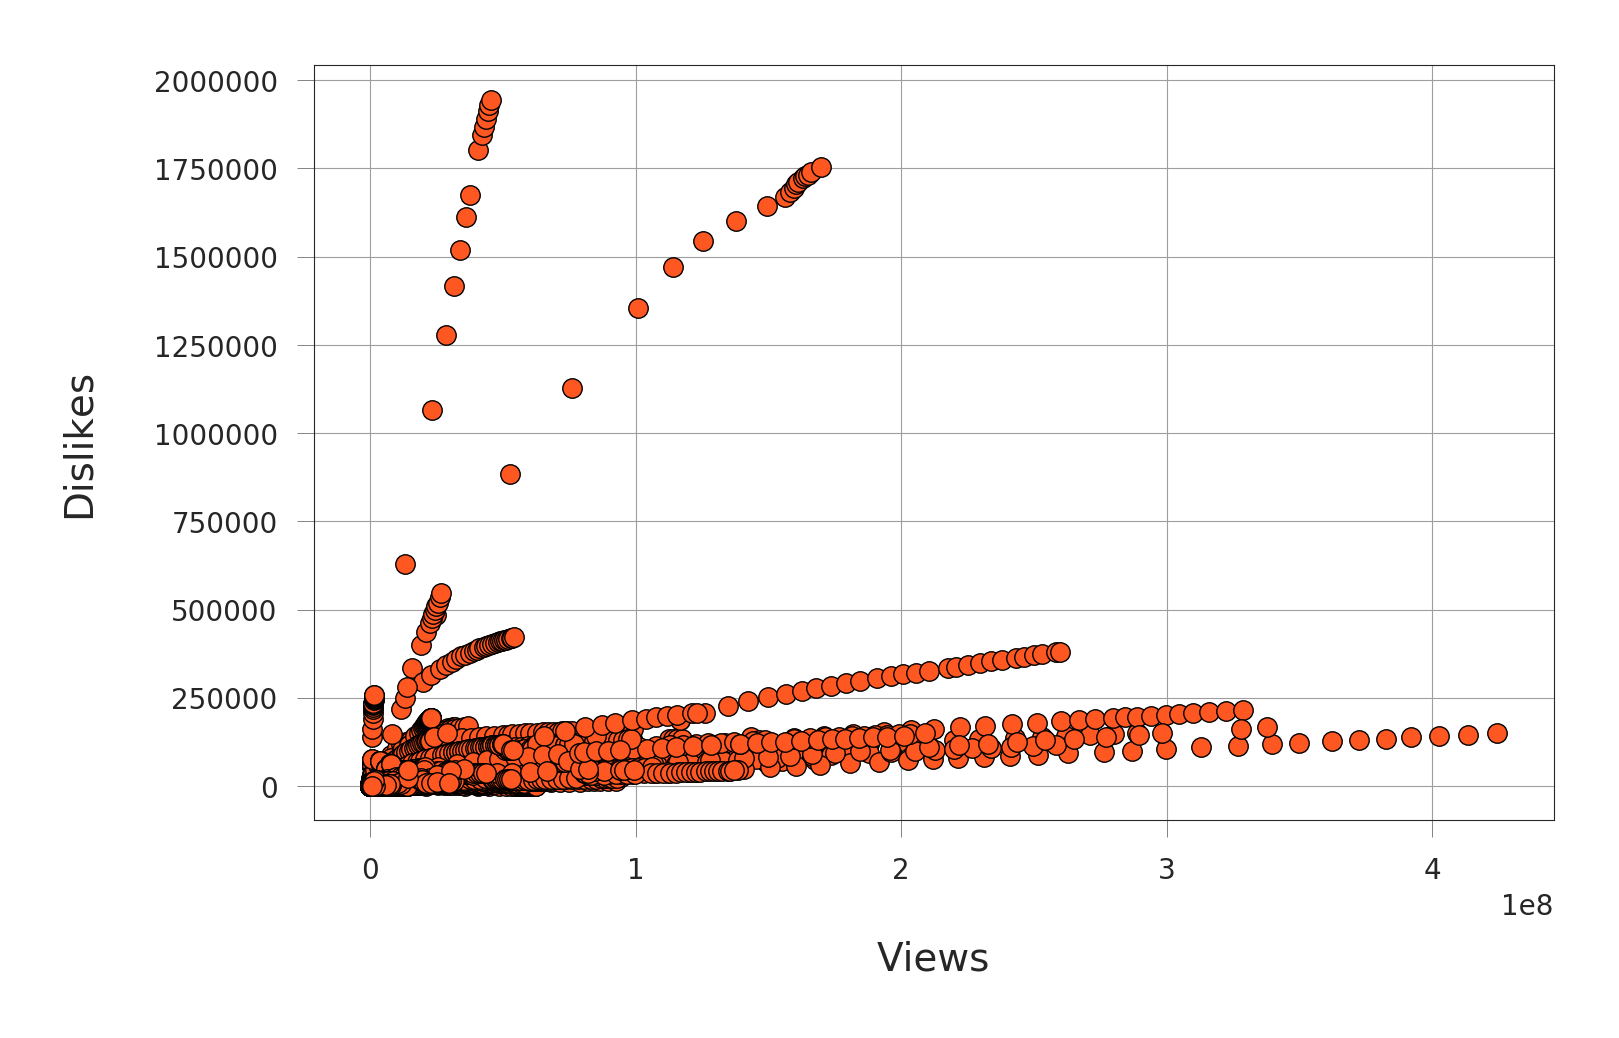

In [23]:
fig, ax = plt.subplots()
plt.scatter(x=df['views'], y=df['dislikes'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="Dislikes");

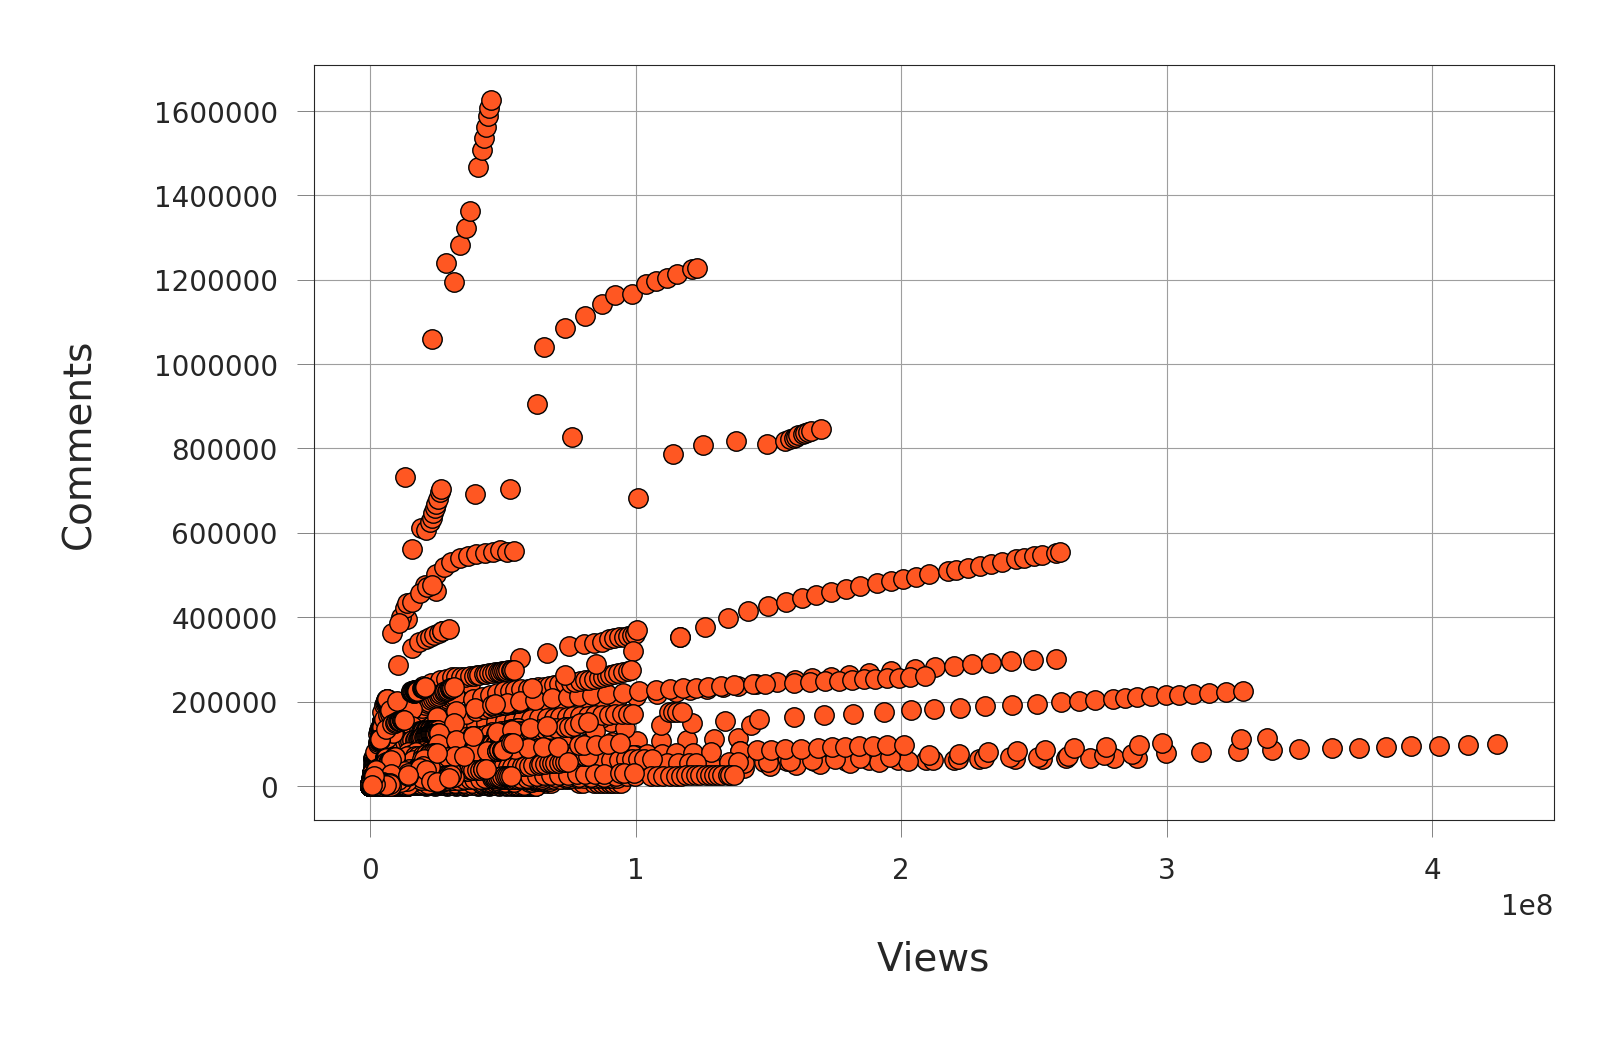

In [24]:
fig, ax = plt.subplots()
plt.scatter(x=df['views'], y=df['comment_count'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="Comments");

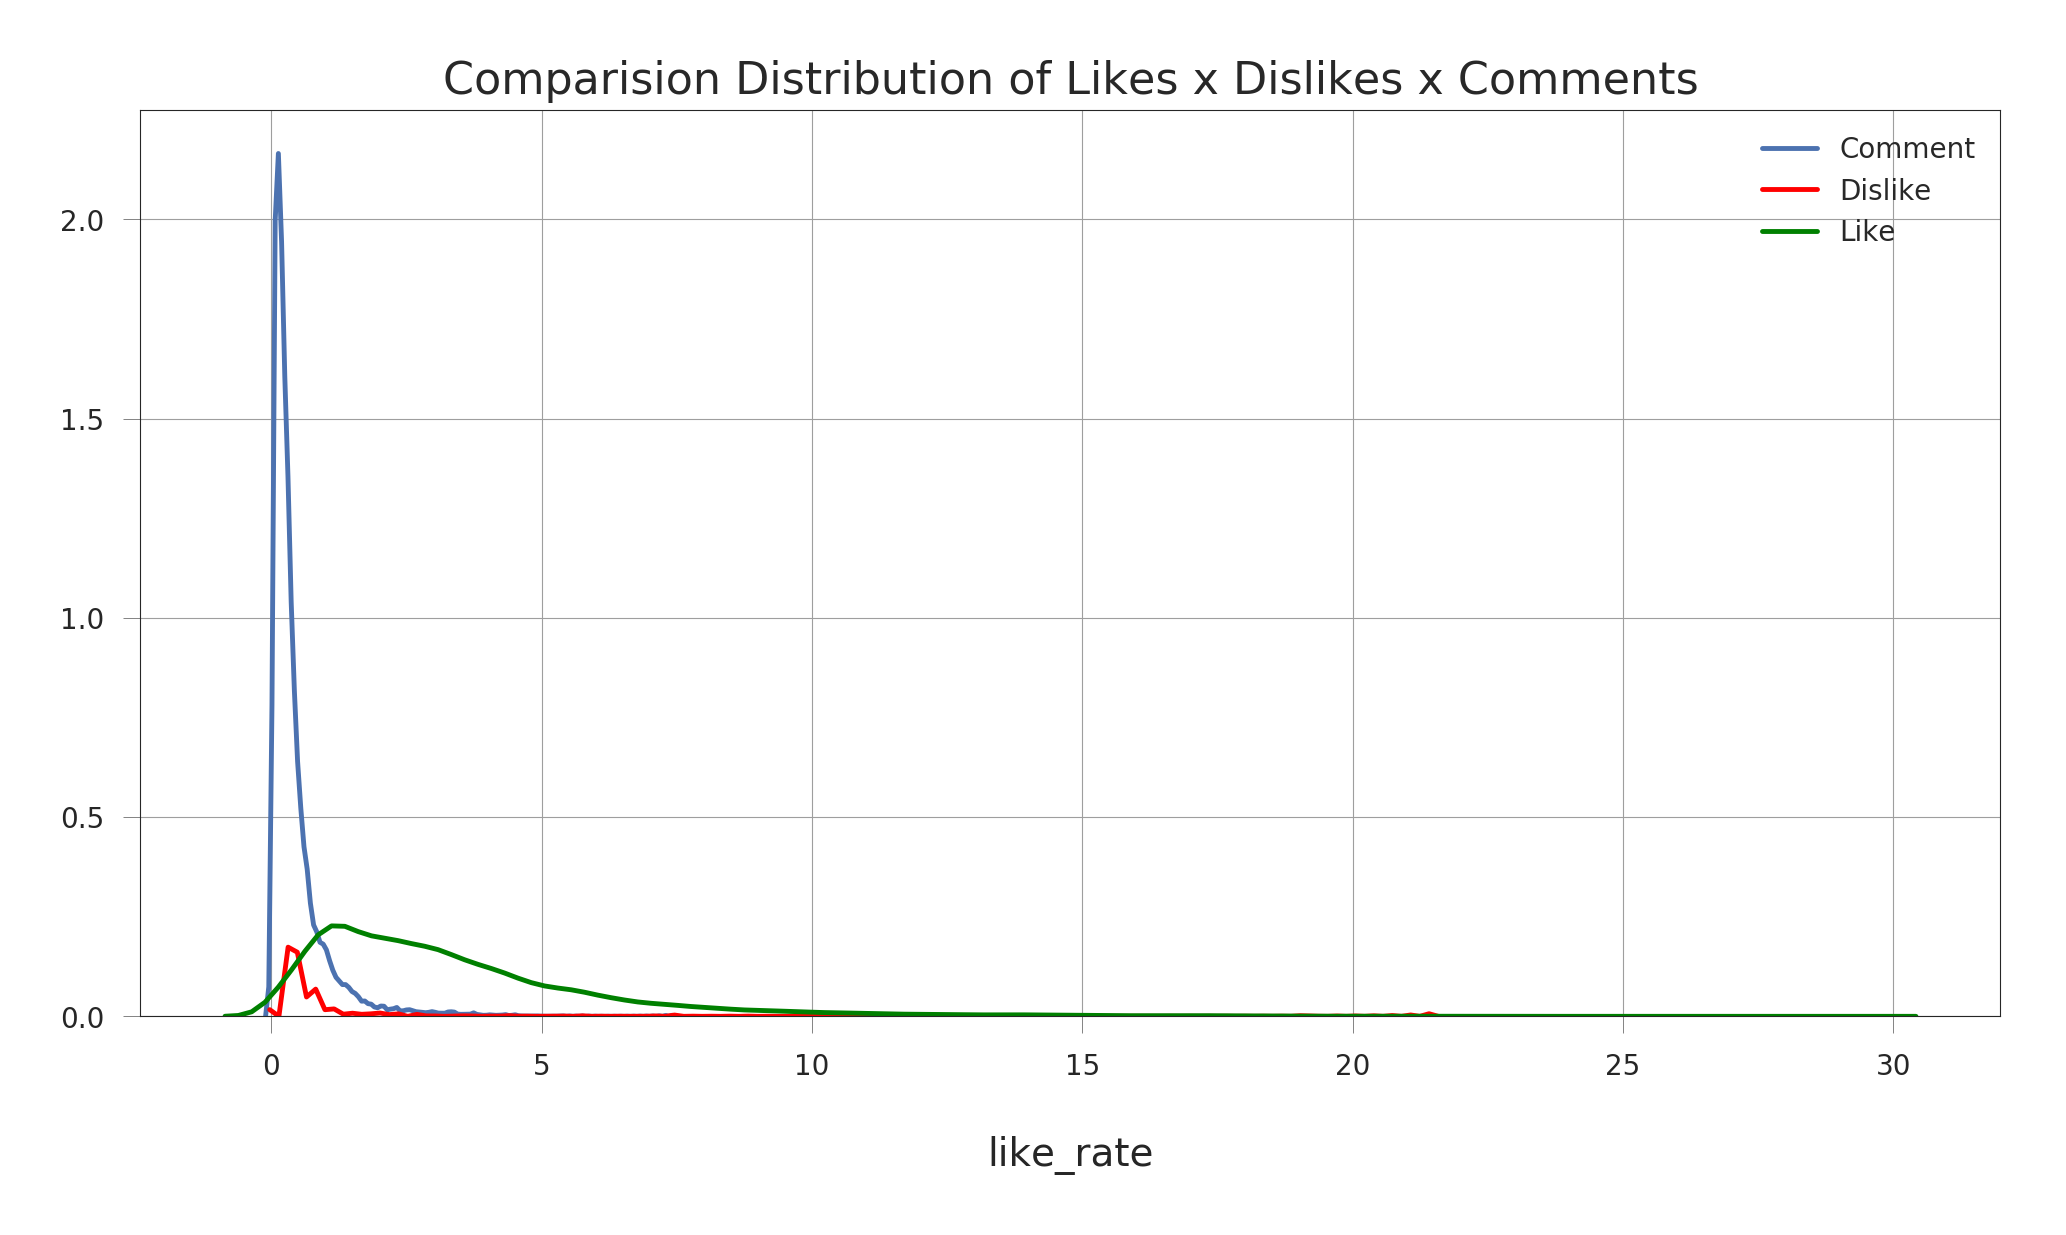

In [25]:
plt.figure(figsize=(12,6))
c1 = sns.distplot(df['comment_rate'],hist=False,label="Comment")
c1 = sns.distplot(df['dislike_rate'], color='red',hist=False, label="Dislike")
c1 = sns.distplot(df['like_rate'], color='green',hist=False, label="Like")

c1.set_title('Comparision Distribution of Likes x Dislikes x Comments', fontsize=16)
plt.legend()
plt.show();

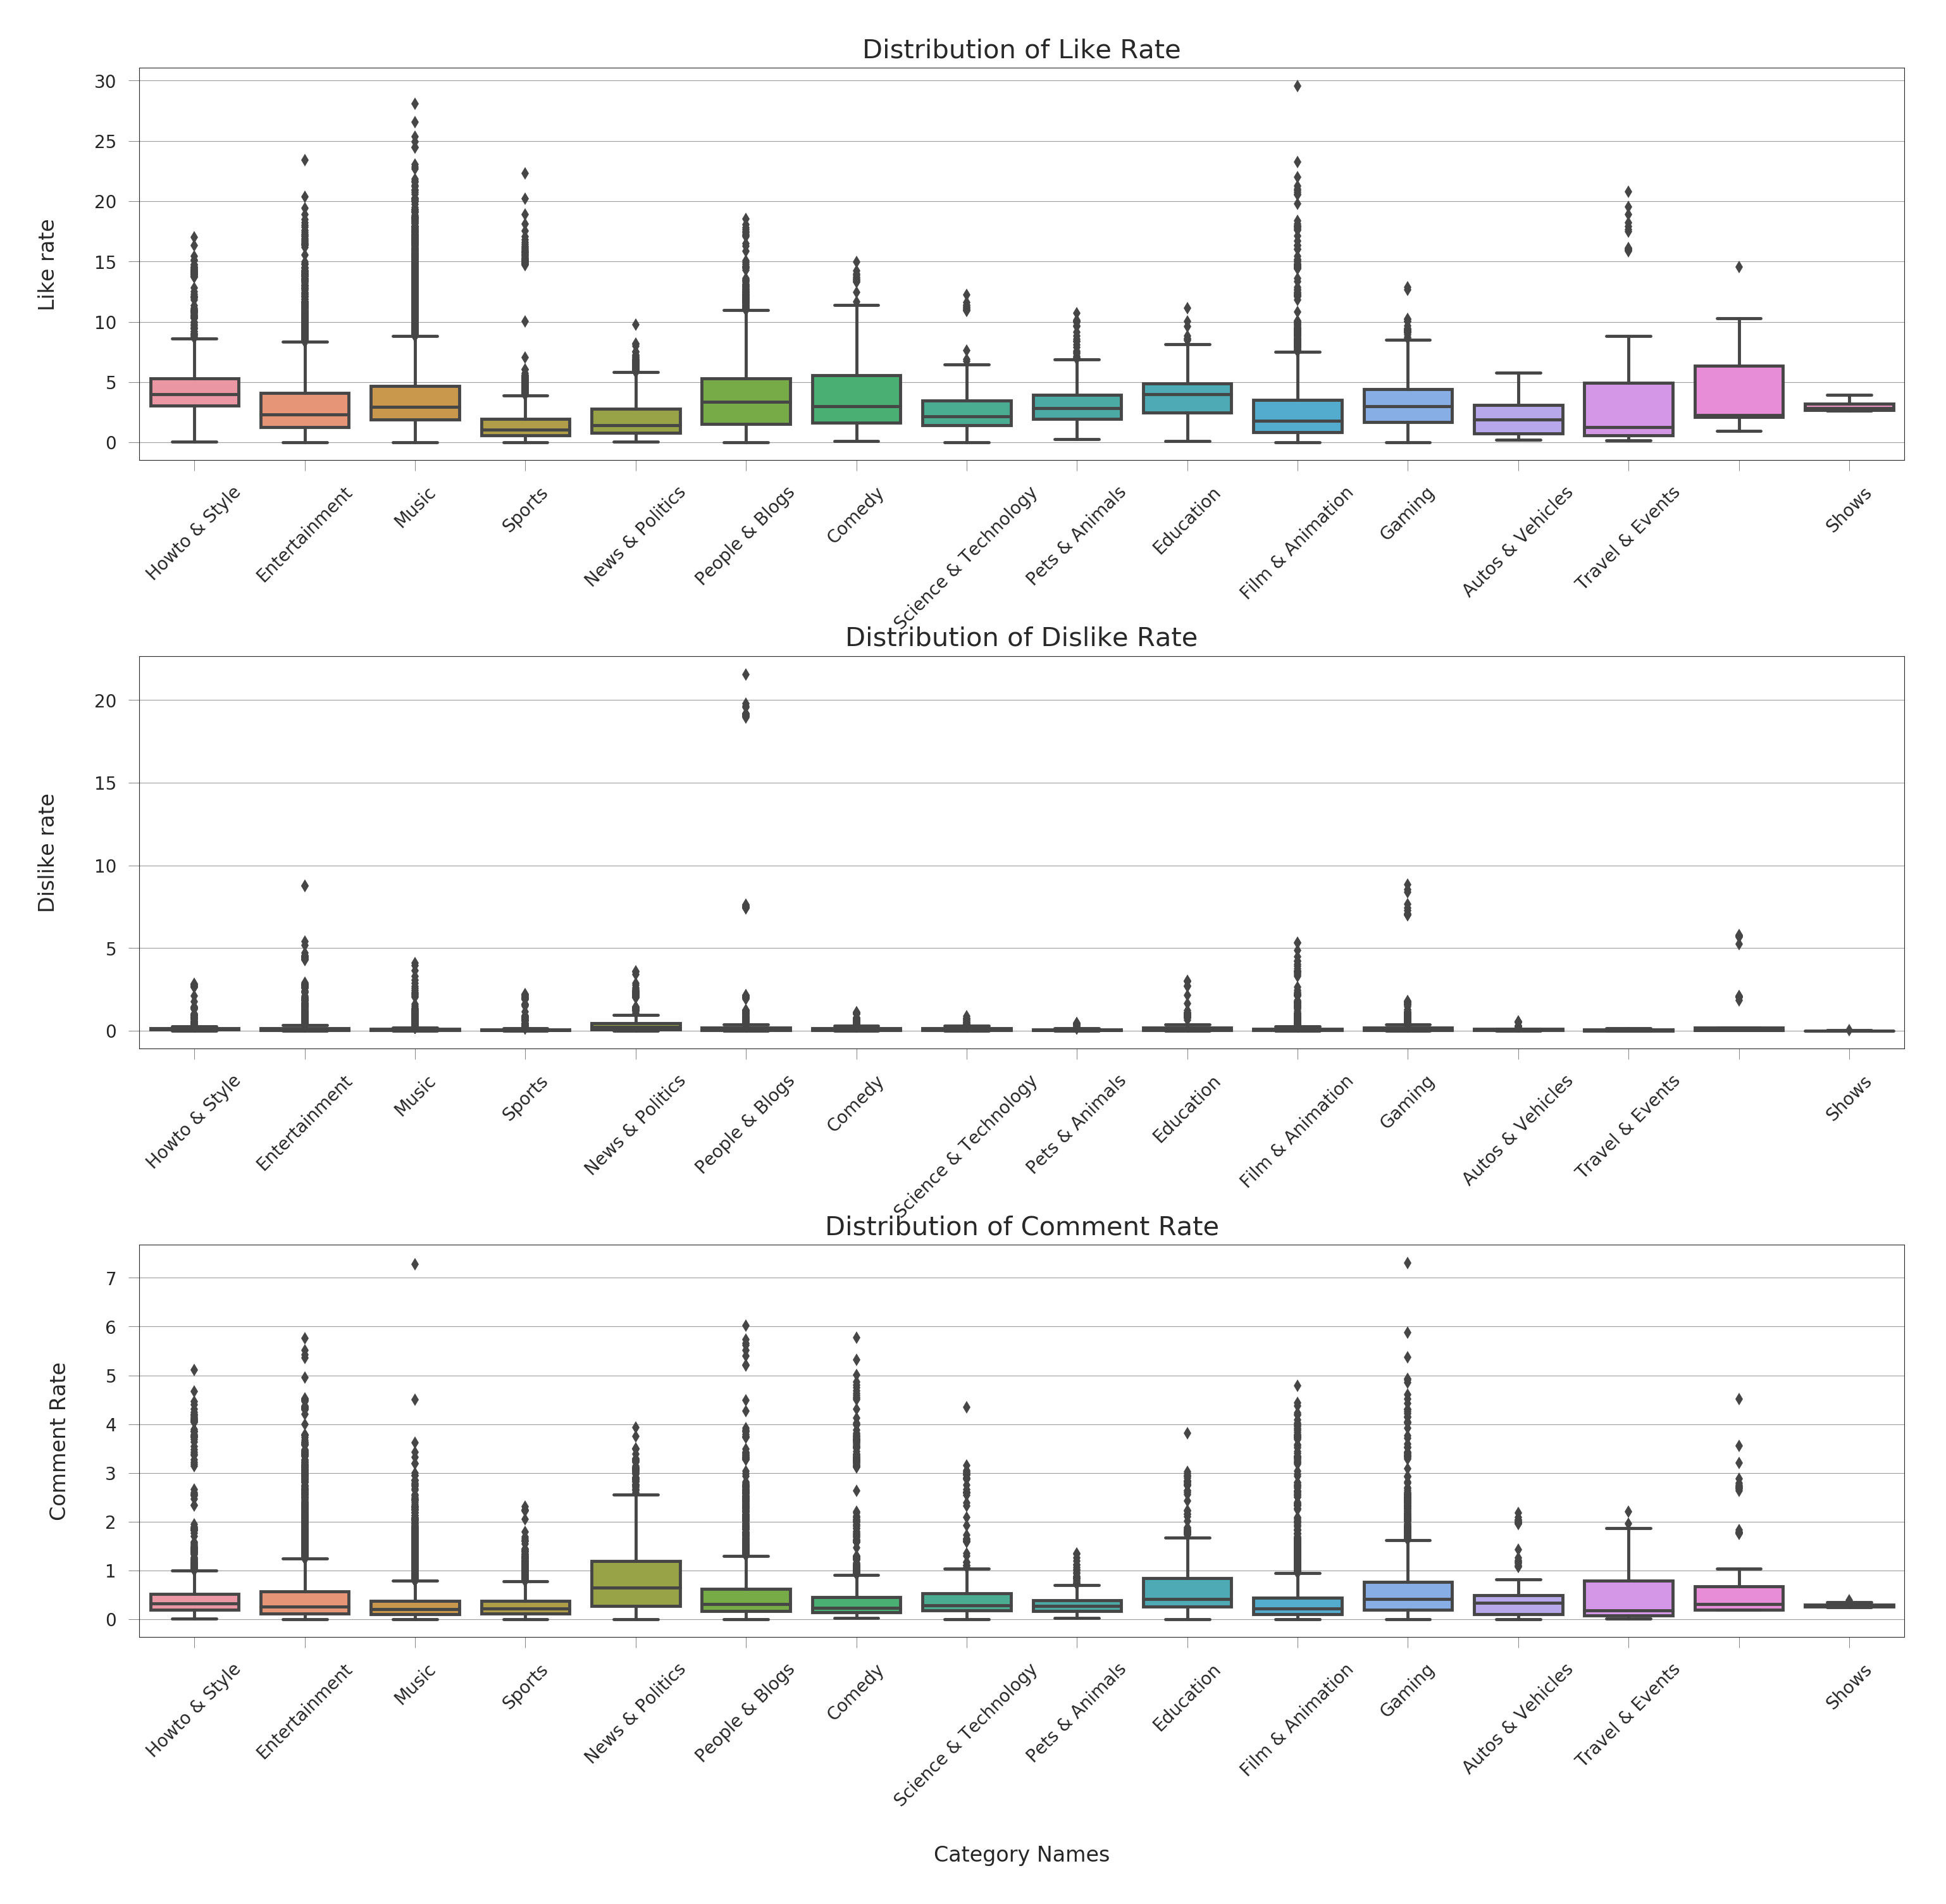

In [26]:
plt.figure(figsize=(18,16))

plt.subplot(311)
r1= sns.boxplot(x='category_name',y='like_rate',  data=df)
r1.set_xticklabels(g.get_xticklabels(),rotation=45)
r1.set_title("Distribution of Like Rate", fontsize=15)
r1.set_xlabel("", fontsize=12)
r1.set_ylabel("Like rate", fontsize=12)


plt.subplot(312)
r2= sns.boxplot(y='dislike_rate', x='category_name', data=df)
r2.set_xticklabels(g.get_xticklabels(),rotation=45)
r2.set_title("Distribution of Dislike Rate", fontsize=15)
r2.set_xlabel("", fontsize=12)
r2.set_ylabel("Dislike rate", fontsize=12)


plt.subplot(313)
r3= sns.boxplot(y='comment_rate', x='category_name', data=df)
r3.set_xticklabels(g.get_xticklabels(),rotation=45)
r3.set_title("Distribution of Comment Rate", fontsize=15)
r3.set_xlabel("Category Names", fontsize=12)
r3.set_ylabel("Comment Rate", fontsize=12)


plt.subplots_adjust(wspace = 0.5, hspace = 0.5,top = 0.9)
plt.show();

In [27]:
df.corr()

views  likes  dislikes  comment_count  \
views                    1.00   0.80      0.39           0.47   
likes                    0.80   1.00      0.45           0.74   
dislikes                 0.39   0.45      1.00           0.77   
comment_count            0.47   0.74      0.77           1.00   
comments_disabled       -0.01  -0.04     -0.01          -0.03   
ratings_disabled         0.01  -0.03     -0.01          -0.02   
video_error_or_removed   0.01   0.01      0.01           0.00   
likes_log                0.41   0.53      0.21           0.36   
views_log                0.53   0.56      0.24           0.36   
dislikes_log             0.45   0.52      0.31           0.40   
comment_log              0.37   0.51      0.24           0.41   
like_rate               -0.12   0.08     -0.03           0.09   
dislike_rate            -0.02  -0.00      0.23           0.12   
comment_rate            -0.12  -0.00      0.08           0.17   

                        comments_disabled  ratings_disabled  \
views                               -0.01              0.01   
likes                               -0.04             -0.03   
dislikes                            -0.01             -0.01   
comment_count                       -0.03             -0.02   
comments_disabled                    1.00              0.51   
ratings_disabled                     0.51              1.00   
video_error_or_removed              -0.01             -0.00   
likes_log                           -0.23             -0.38   
views_log                            0.00              0.01   
dislikes_log                        -0.12             -0.26   
comment_log                         -0.48             -0.27   
like_rate                           -0.11             -0.10   
dislike_rate                         0.06             -0.02   
comment_rate                        -0.10             -0.06   

                        video_error_or_removed  likes_log  views_log  \
views                                     0.01       0.41       0.53   
likes                                     0.01       0.53       0.56   
dislikes                                  0.01       0.21       0.24   
comment_count                             0.00       0.36       0.36   
comments_disabled                        -0.01      -0.23       0.00   
ratings_disabled                         -0.00      -0.38       0.01   
video_error_or_removed                    1.00       0.02       0.03   
likes_log                                 0.02       1.00       0.83   
views_log                                 0.03       0.83       1.00   
dislikes_log                              0.02       0.85       0.85   
comment_log                               0.00       0.84       0.73   
like_rate                                -0.01       0.27      -0.12   
dislike_rate                             -0.00      -0.04      -0.04   
comment_rate                             -0.02      -0.03      -0.25   

                        dislikes_log  comment_log  like_rate  dislike_rate  \
views                           0.45         0.37      -0.12         -0.02   
likes                           0.52         0.51       0.08         -0.00   
dislikes                        0.31         0.24      -0.03          0.23   
comment_count                   0.40         0.41       0.09          0.12   
comments_disabled              -0.12        -0.48      -0.11          0.06   
ratings_disabled               -0.26        -0.27      -0.10         -0.02   
video_error_or_removed          0.02         0.00      -0.01         -0.00   
likes_log                       0.85         0.84       0.27         -0.04   
views_log                       0.85         0.73      -0.12         -0.04   
dislikes_log                    1.00         0.80      -0.02          0.19   
comment_log                     0.80         1.00       0.22          0.04   
like_rate                      -0.02         0.22       1.00         -0.00   
dislike

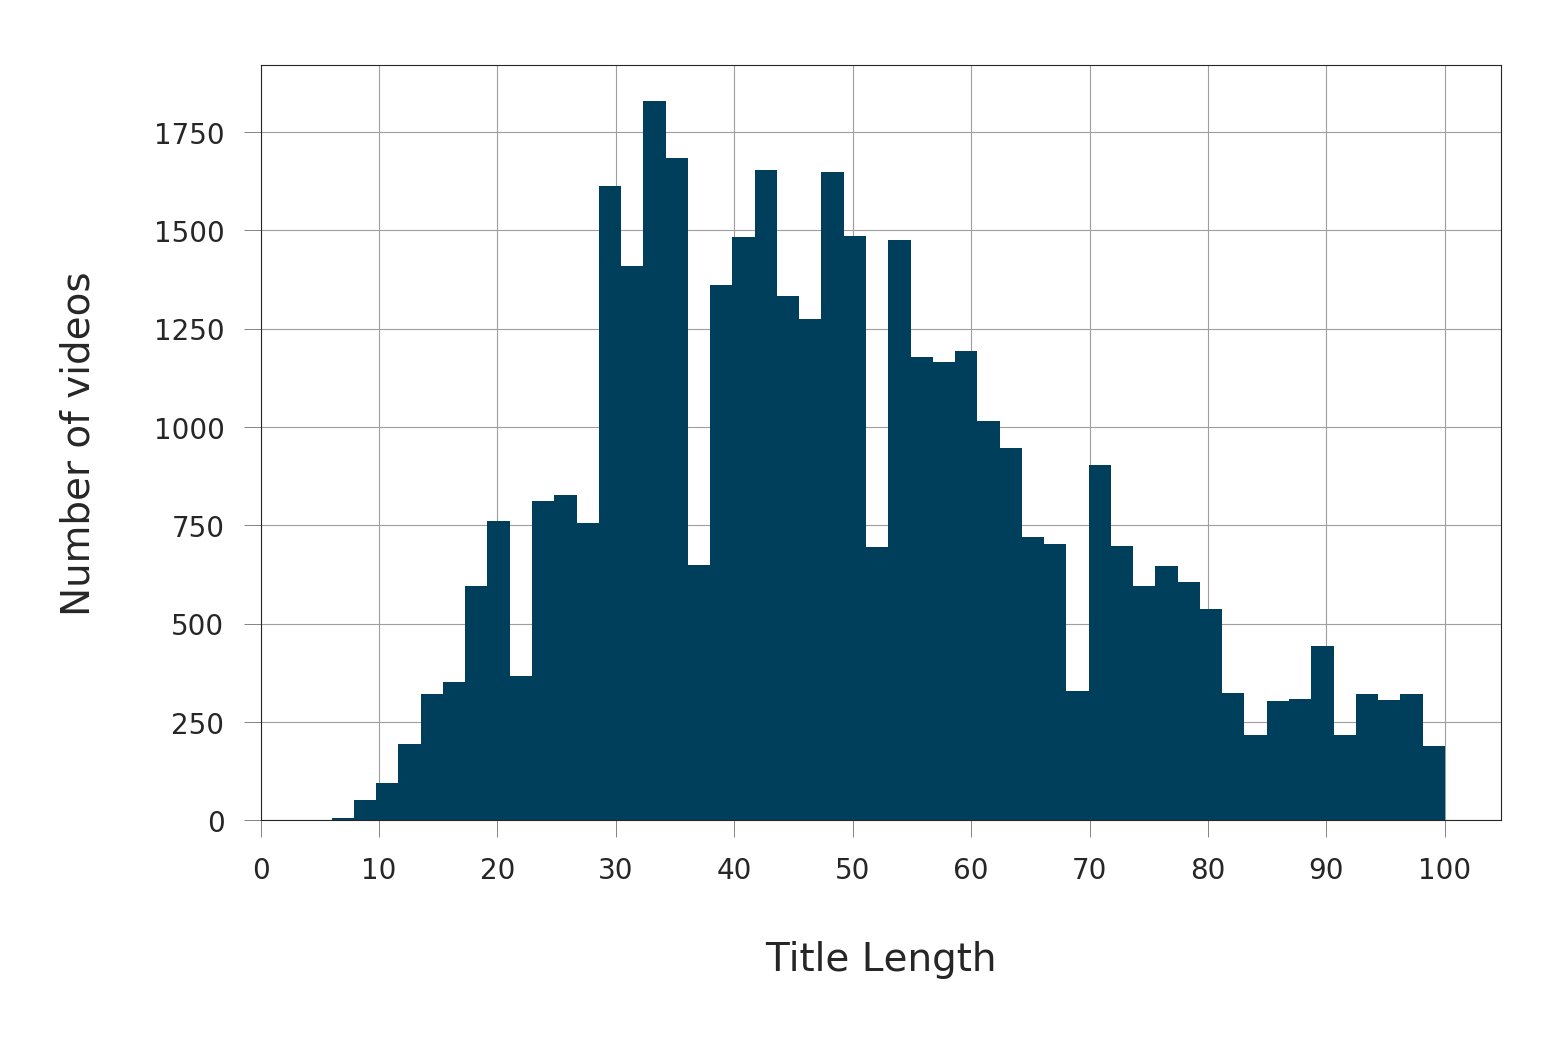

In [28]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
sns.distplot(df["title_length"], kde=False, rug=False, color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
ax.set(xlabel="Title Length", ylabel="Number of videos", xticks=range(0, 110, 10));

In [29]:
df['title'].value_counts()

Maroon 5 - Wait                                                                                 40
Justin Timberlake’s FULL Pepsi Super Bowl LII Halftime Show! | NFL Highlights                   38
Jurassic World: Fallen Kingdom - Official Trailer #2 [HD]                                       38
To Our Daughter                                                                                 38
Anne-Marie - 2002 [Official Video]                                                              38
Royce da 5'9 - Caterpillar ft. Eminem, King Green                                               37
BHAD BHABIE feat. Lil Yachty - Gucci Flip Flops (Official Music Video) | Danielle Bregoli       37
Rich Brian - Cold (Official Music Video)                                                        37
Sam Smith - Pray (Official Video) ft. Logic                                                     37
Janelle Monáe – Make Me Feel [Official Music Video]                                             37
Fergie Per

In [30]:
df['comments_disabled'].value_counts()

False    38233
True       683
Name: comments_disabled, dtype: int64

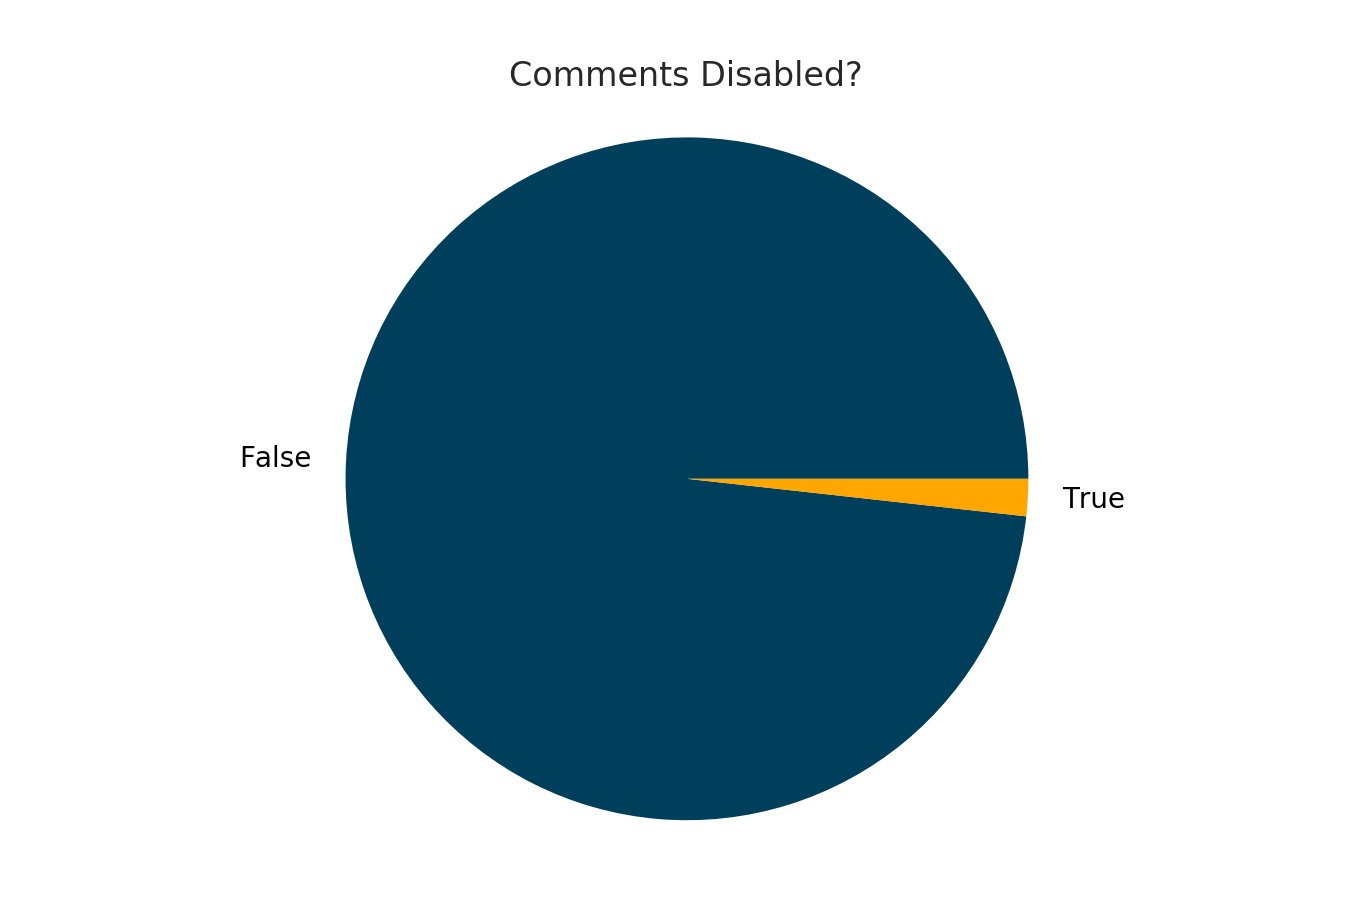

In [31]:
value_counts = df["comments_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie(x=[value_counts[False], value_counts[True]], labels=['False', 'True'], colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
ax.axis('equal')
ax.set_title('Comments Disabled?');

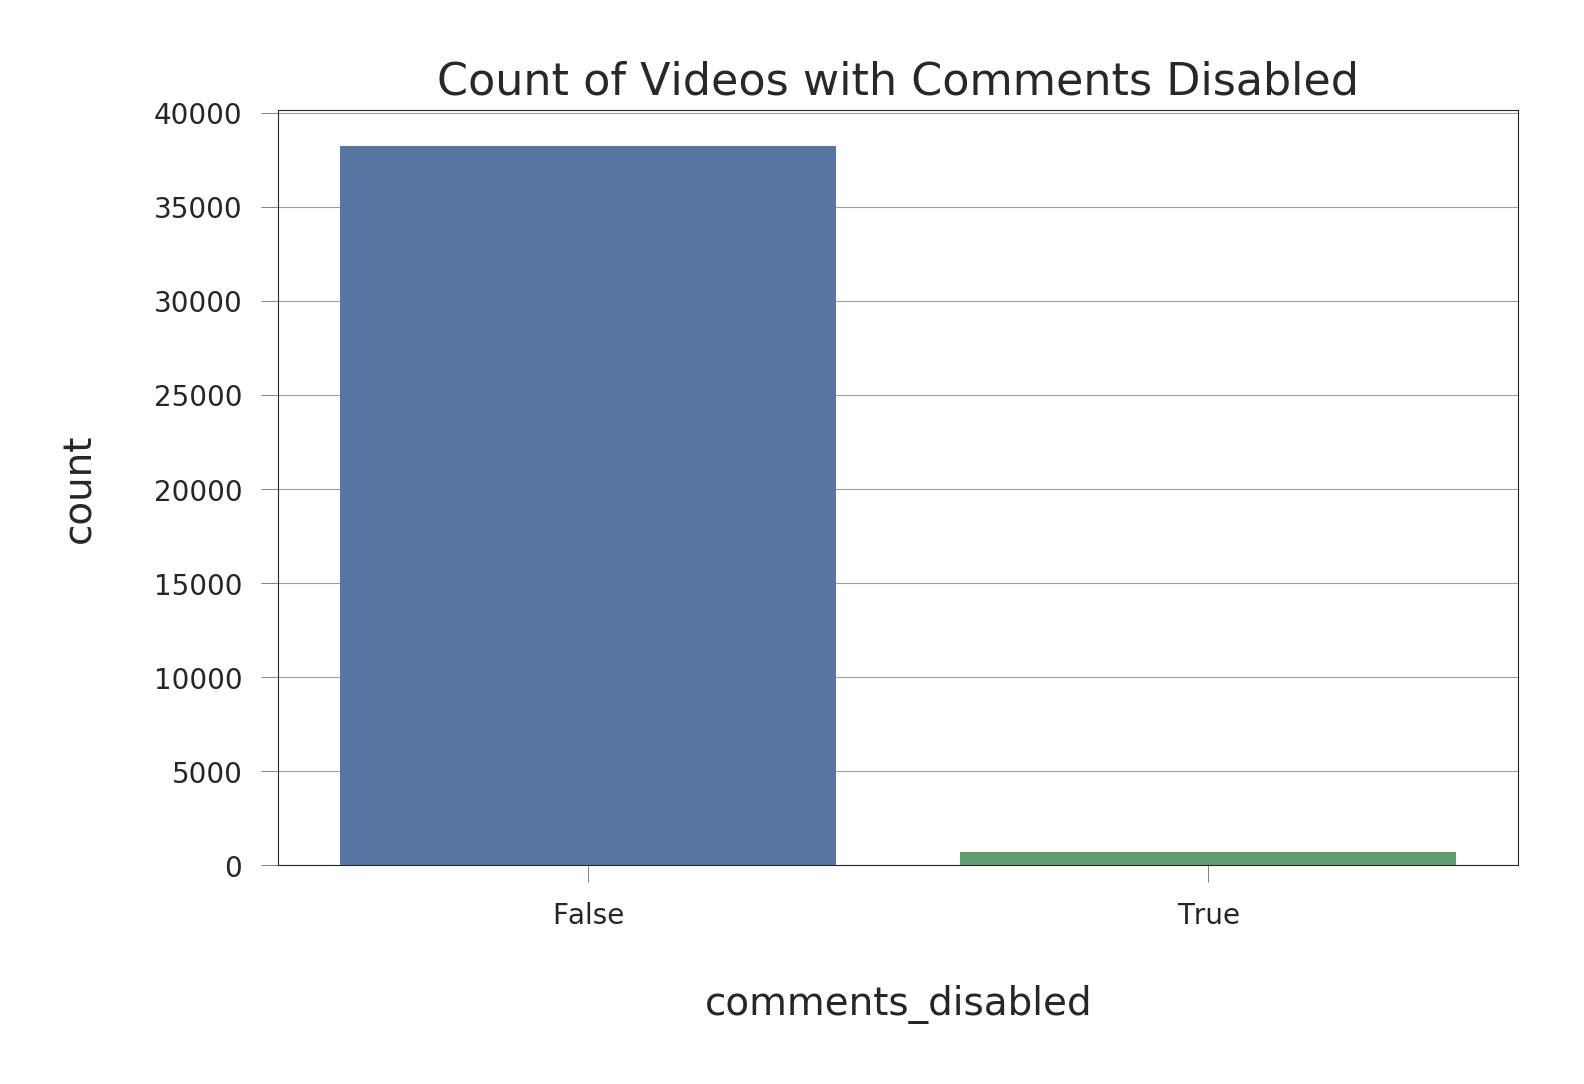

In [32]:
p1 = sns.countplot(x='comments_disabled', data=df)
p1.set_title("Count of Videos with Comments Disabled", fontsize=16);

In [33]:
df['ratings_disabled'].value_counts()

False    38644
True       272
Name: ratings_disabled, dtype: int64

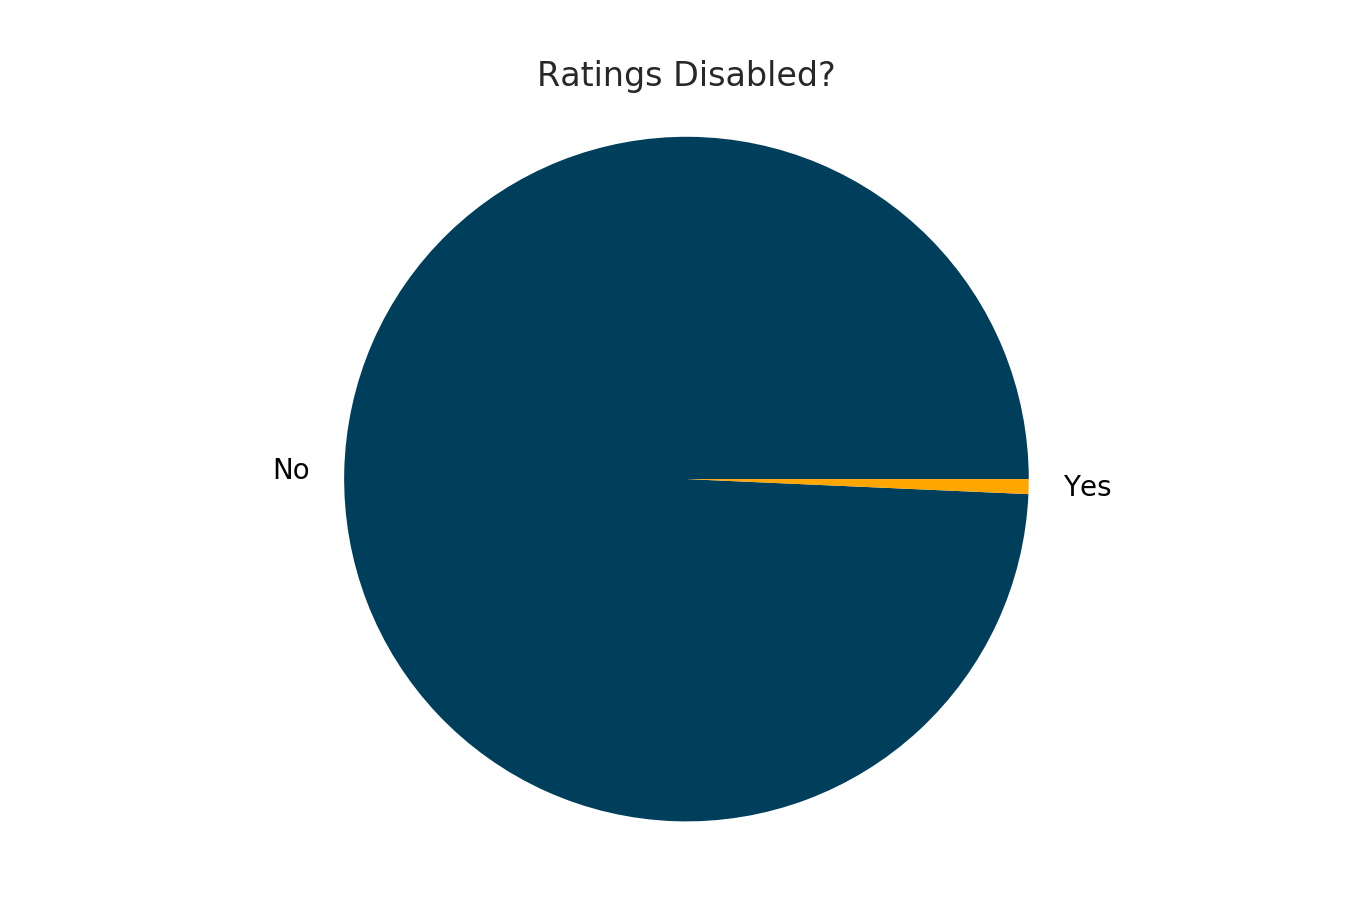

In [34]:
value_counts = df["ratings_disabled"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
ax.axis('equal')
ax.set_title('Ratings Disabled?');

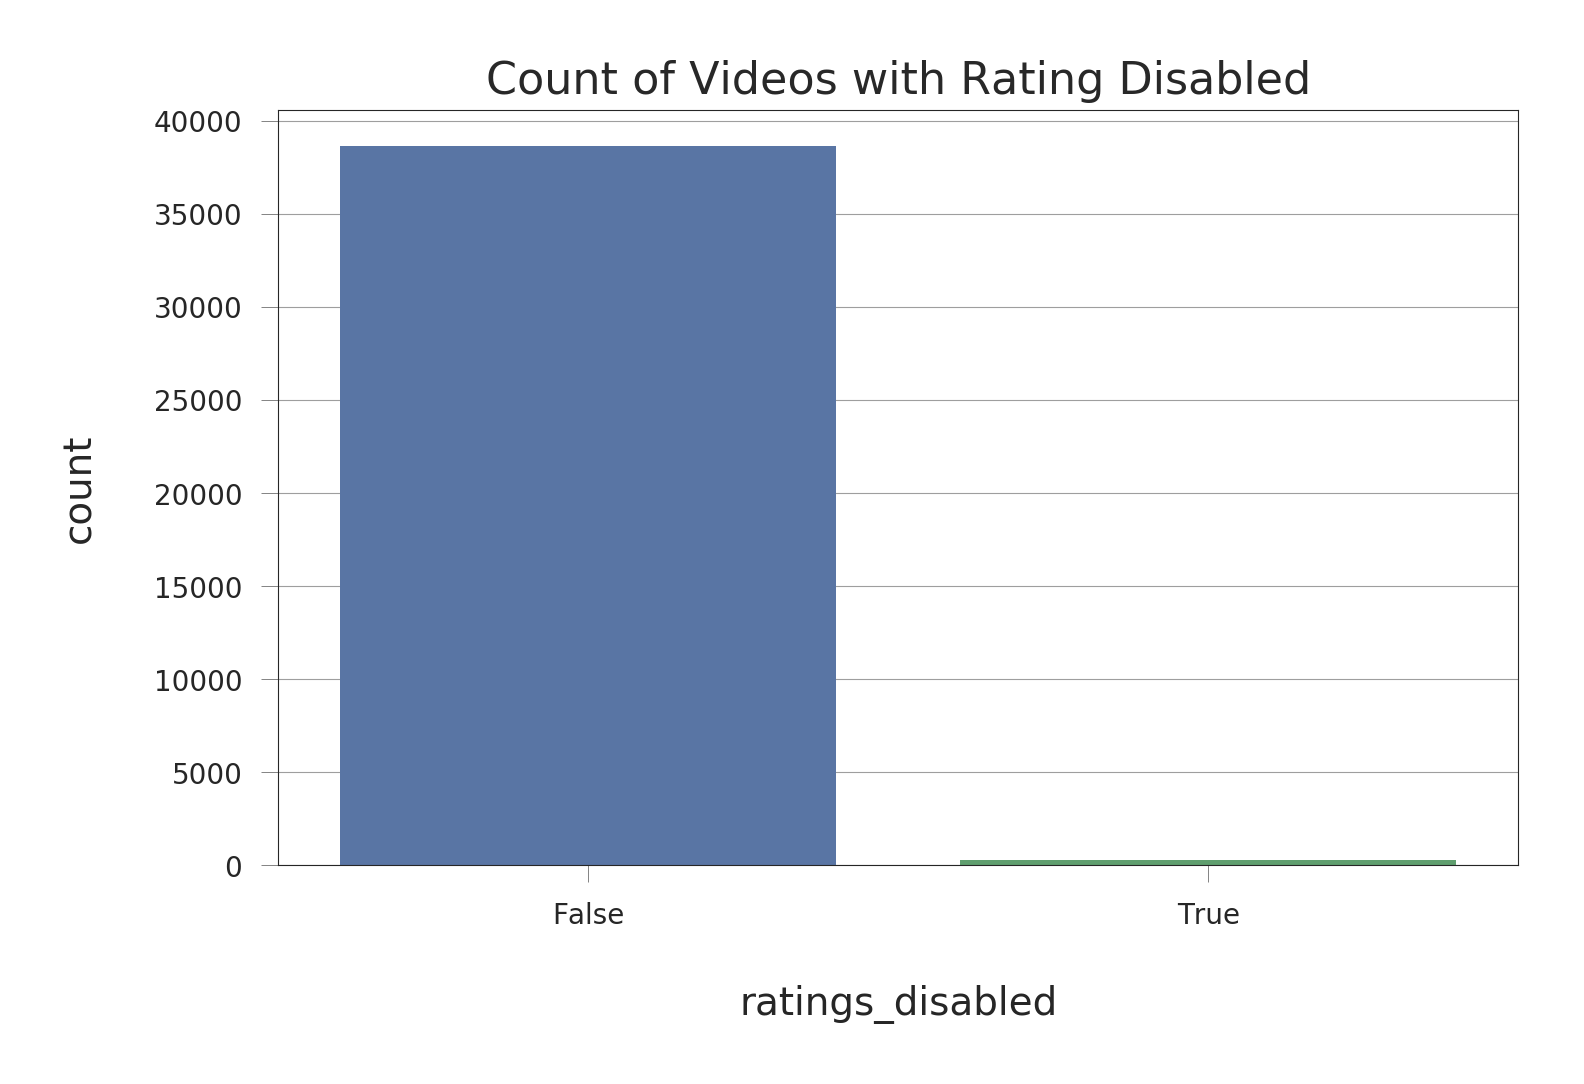

In [35]:
p2 = sns.countplot(x='ratings_disabled', data=df)
p2.set_title("Count of Videos with Rating Disabled", fontsize=16);

In [36]:
print("Videos that have both comments and ratings disabled")
len(df[(df["comments_disabled"] == True) & (df["ratings_disabled"] == True)].index)

Videos that have both comments and ratings disabled


224

In [37]:
df['video_error_or_removed'].value_counts()

False    38847
True        69
Name: video_error_or_removed, dtype: int64

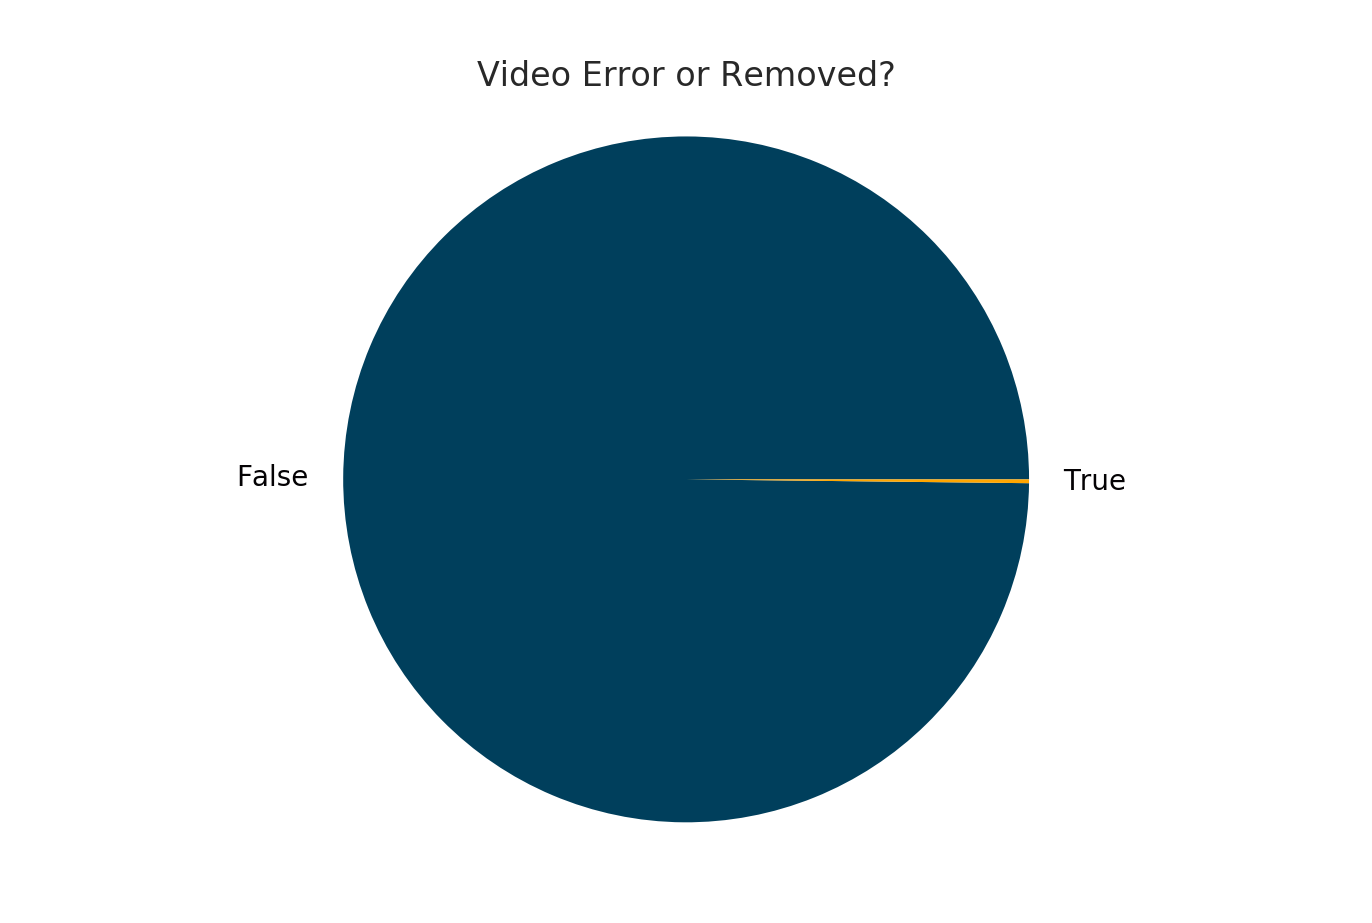

In [38]:
value_counts = df["video_error_or_removed"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie([value_counts[False], value_counts[True]], labels=['False', 'True'], 
        colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'})
ax.axis('equal')
ax.set_title('Video Error or Removed?');

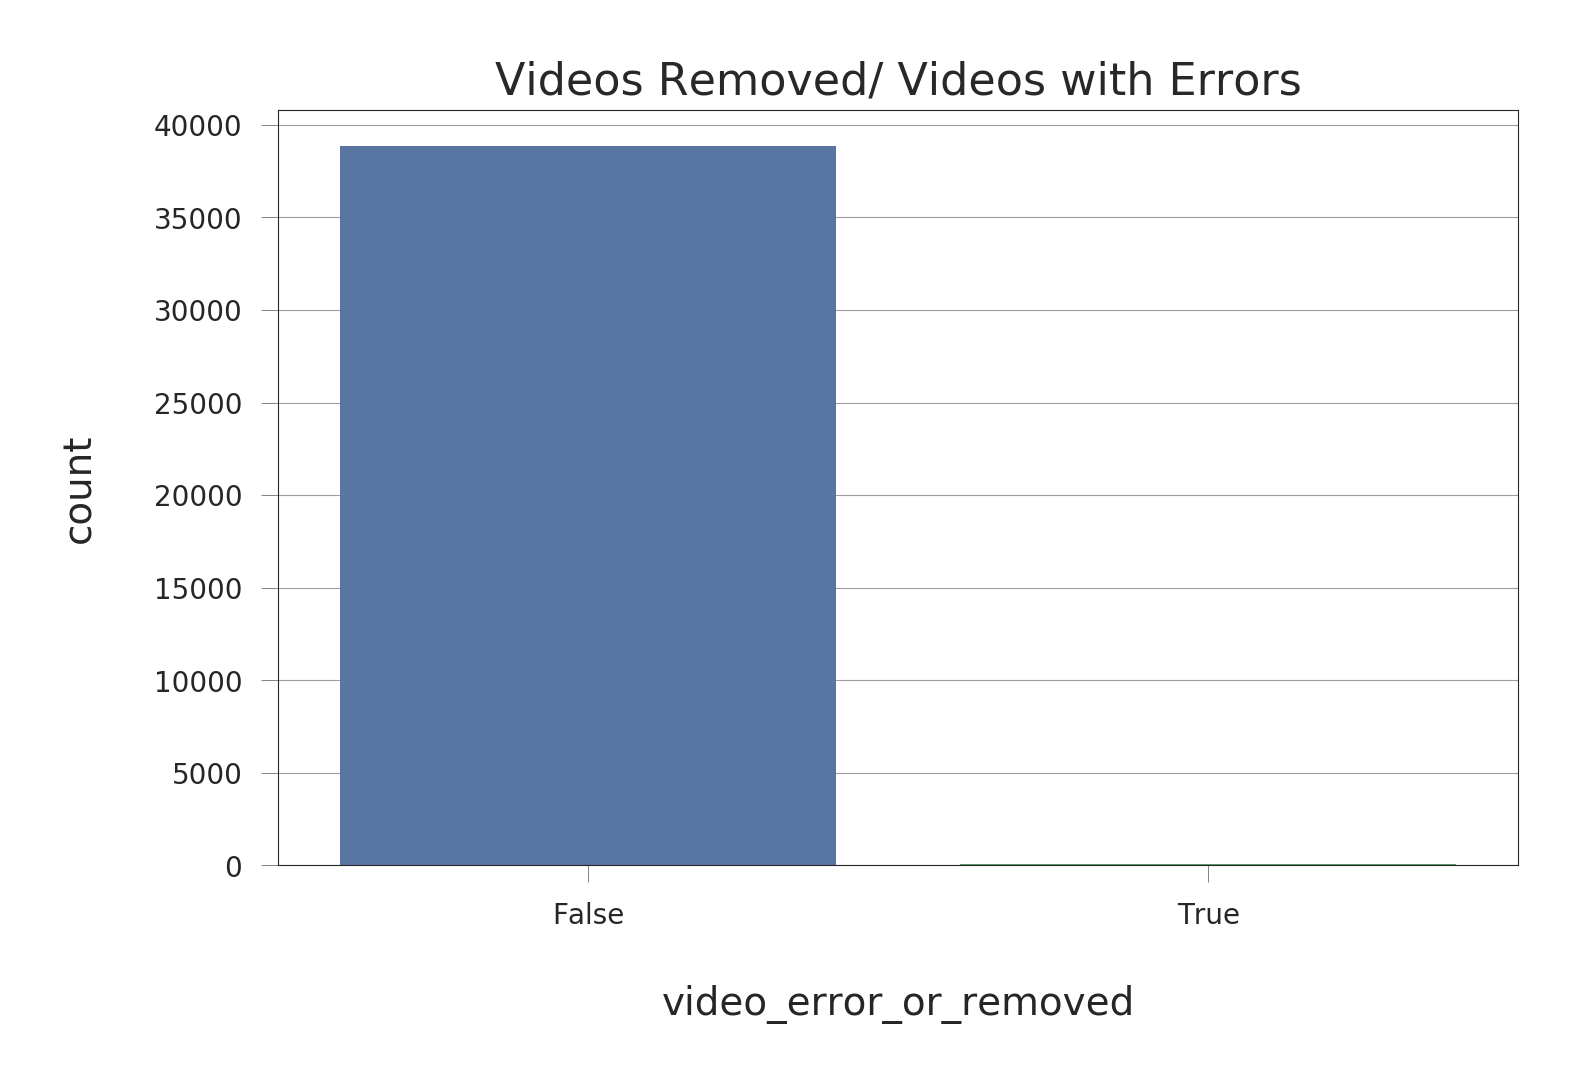

In [39]:
p3 = sns.countplot(x='video_error_or_removed', data=df)
p3.set_title("Videos Removed/ Videos with Errors", fontsize=16);

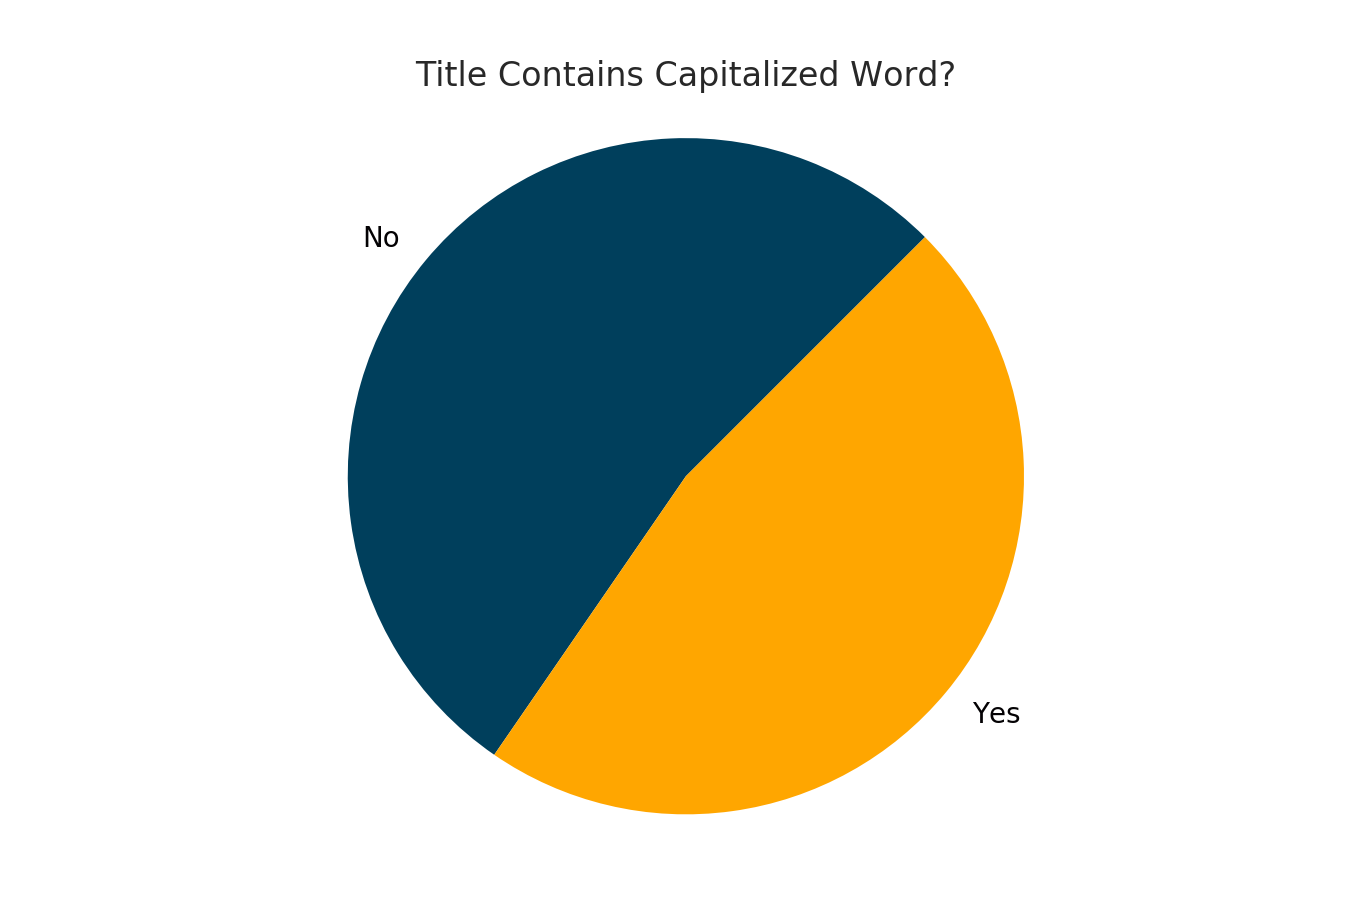

In [40]:
def contains_capitalized_word(s):
    for w in s.split():
        if w.isupper():
            return True
    return False


df["contains_capitalized"] = df["title"].apply(contains_capitalized_word)

value_counts = df["contains_capitalized"].value_counts().to_dict()
fig, ax = plt.subplots()
ax.pie([value_counts[False], value_counts[True]], labels=['No', 'Yes'], colors=['#003f5c', '#ffa600'], textprops={'color': '#040204'}, startangle=45)
ax.axis('equal')
ax.set_title('Title Contains Capitalized Word?');

In [41]:
df["contains_capitalized"].value_counts(normalize=True)

False   0.53
True    0.47
Name: contains_capitalized, dtype: float64

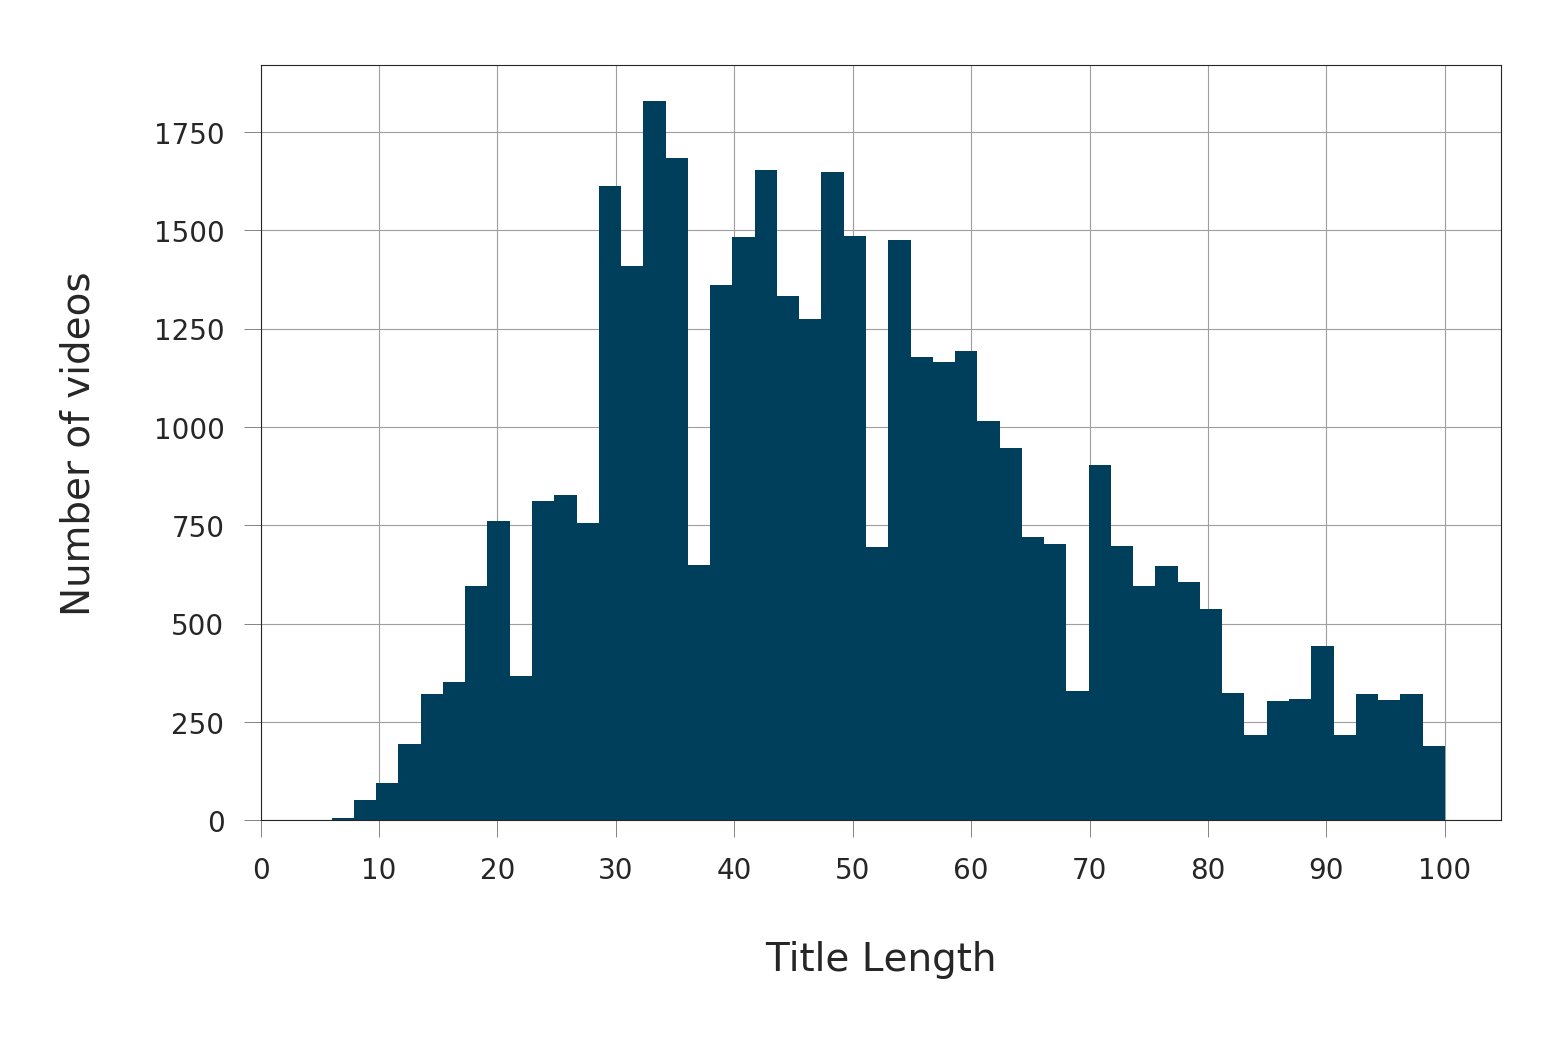

In [42]:
df["title_length"] = df["title"].apply(lambda x: len(x))

fig, ax = plt.subplots()
sns.distplot(df["title_length"], kde=False, rug=False, color=PLOT_COLORS[4], hist_kws={'alpha': 1}, ax=ax)
ax.set(xlabel="Title Length", ylabel="Number of videos", xticks=range(0, 110, 10));

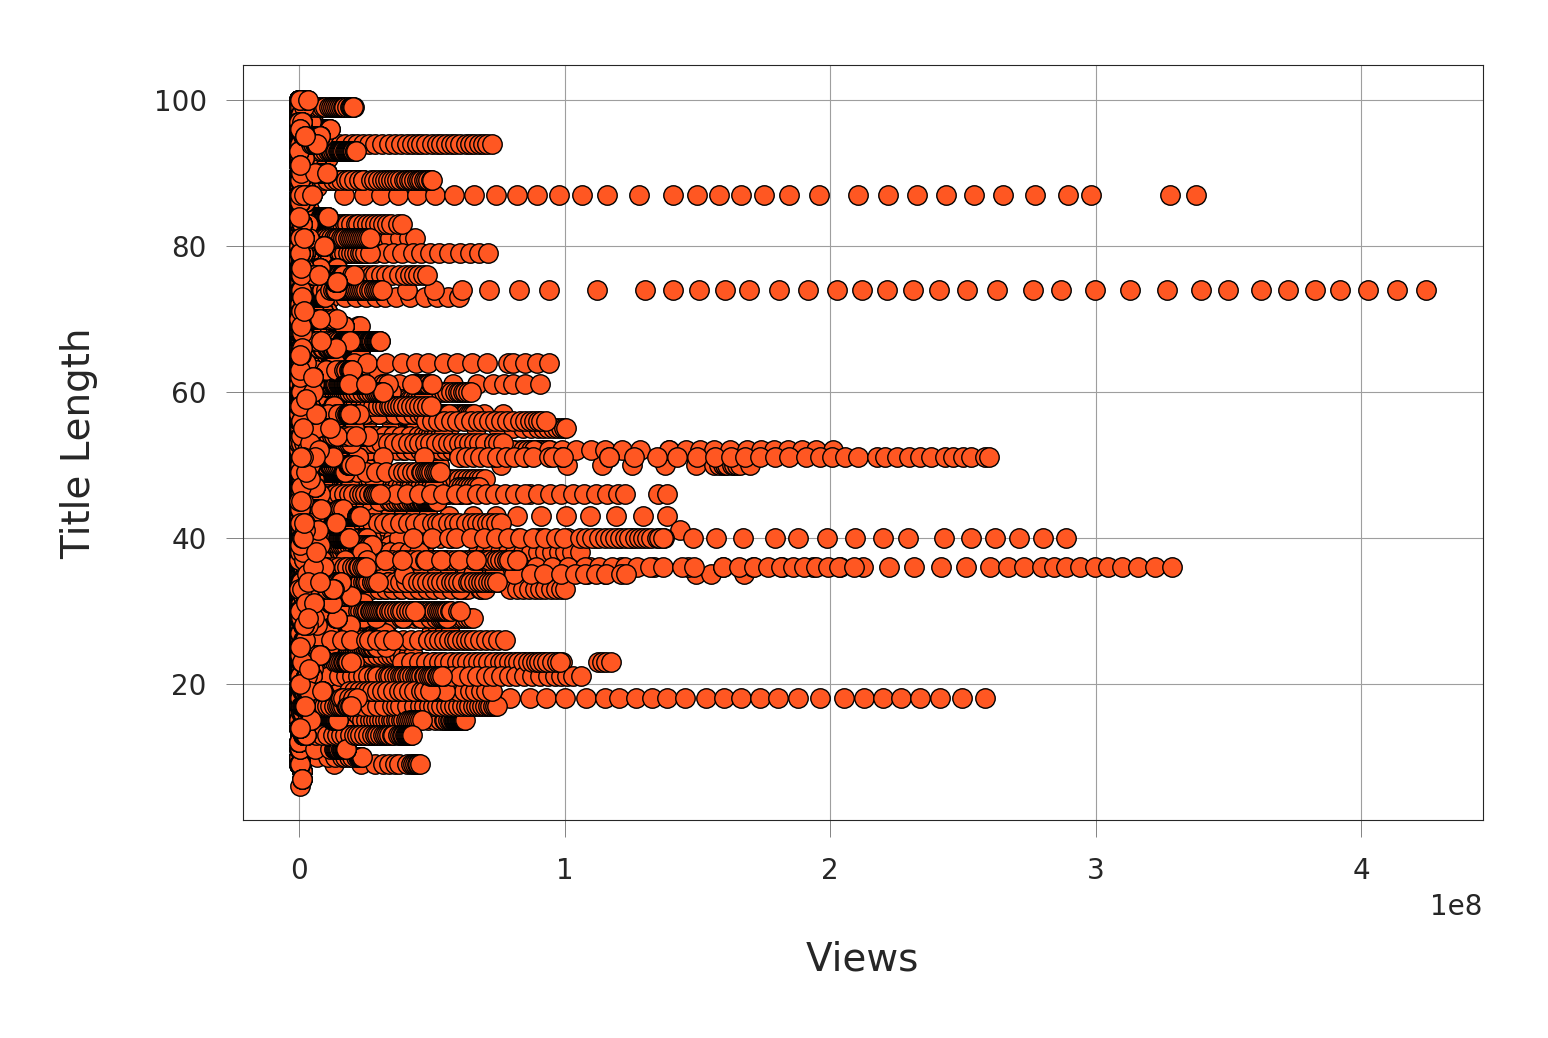

In [43]:
fig, ax = plt.subplots()
ax.scatter(x=df['views'], y=df['title_length'], color=PLOT_COLORS[2], edgecolors="#000000", linewidths=0.5)
ax.set(xlabel="Views", ylabel="Title Length");

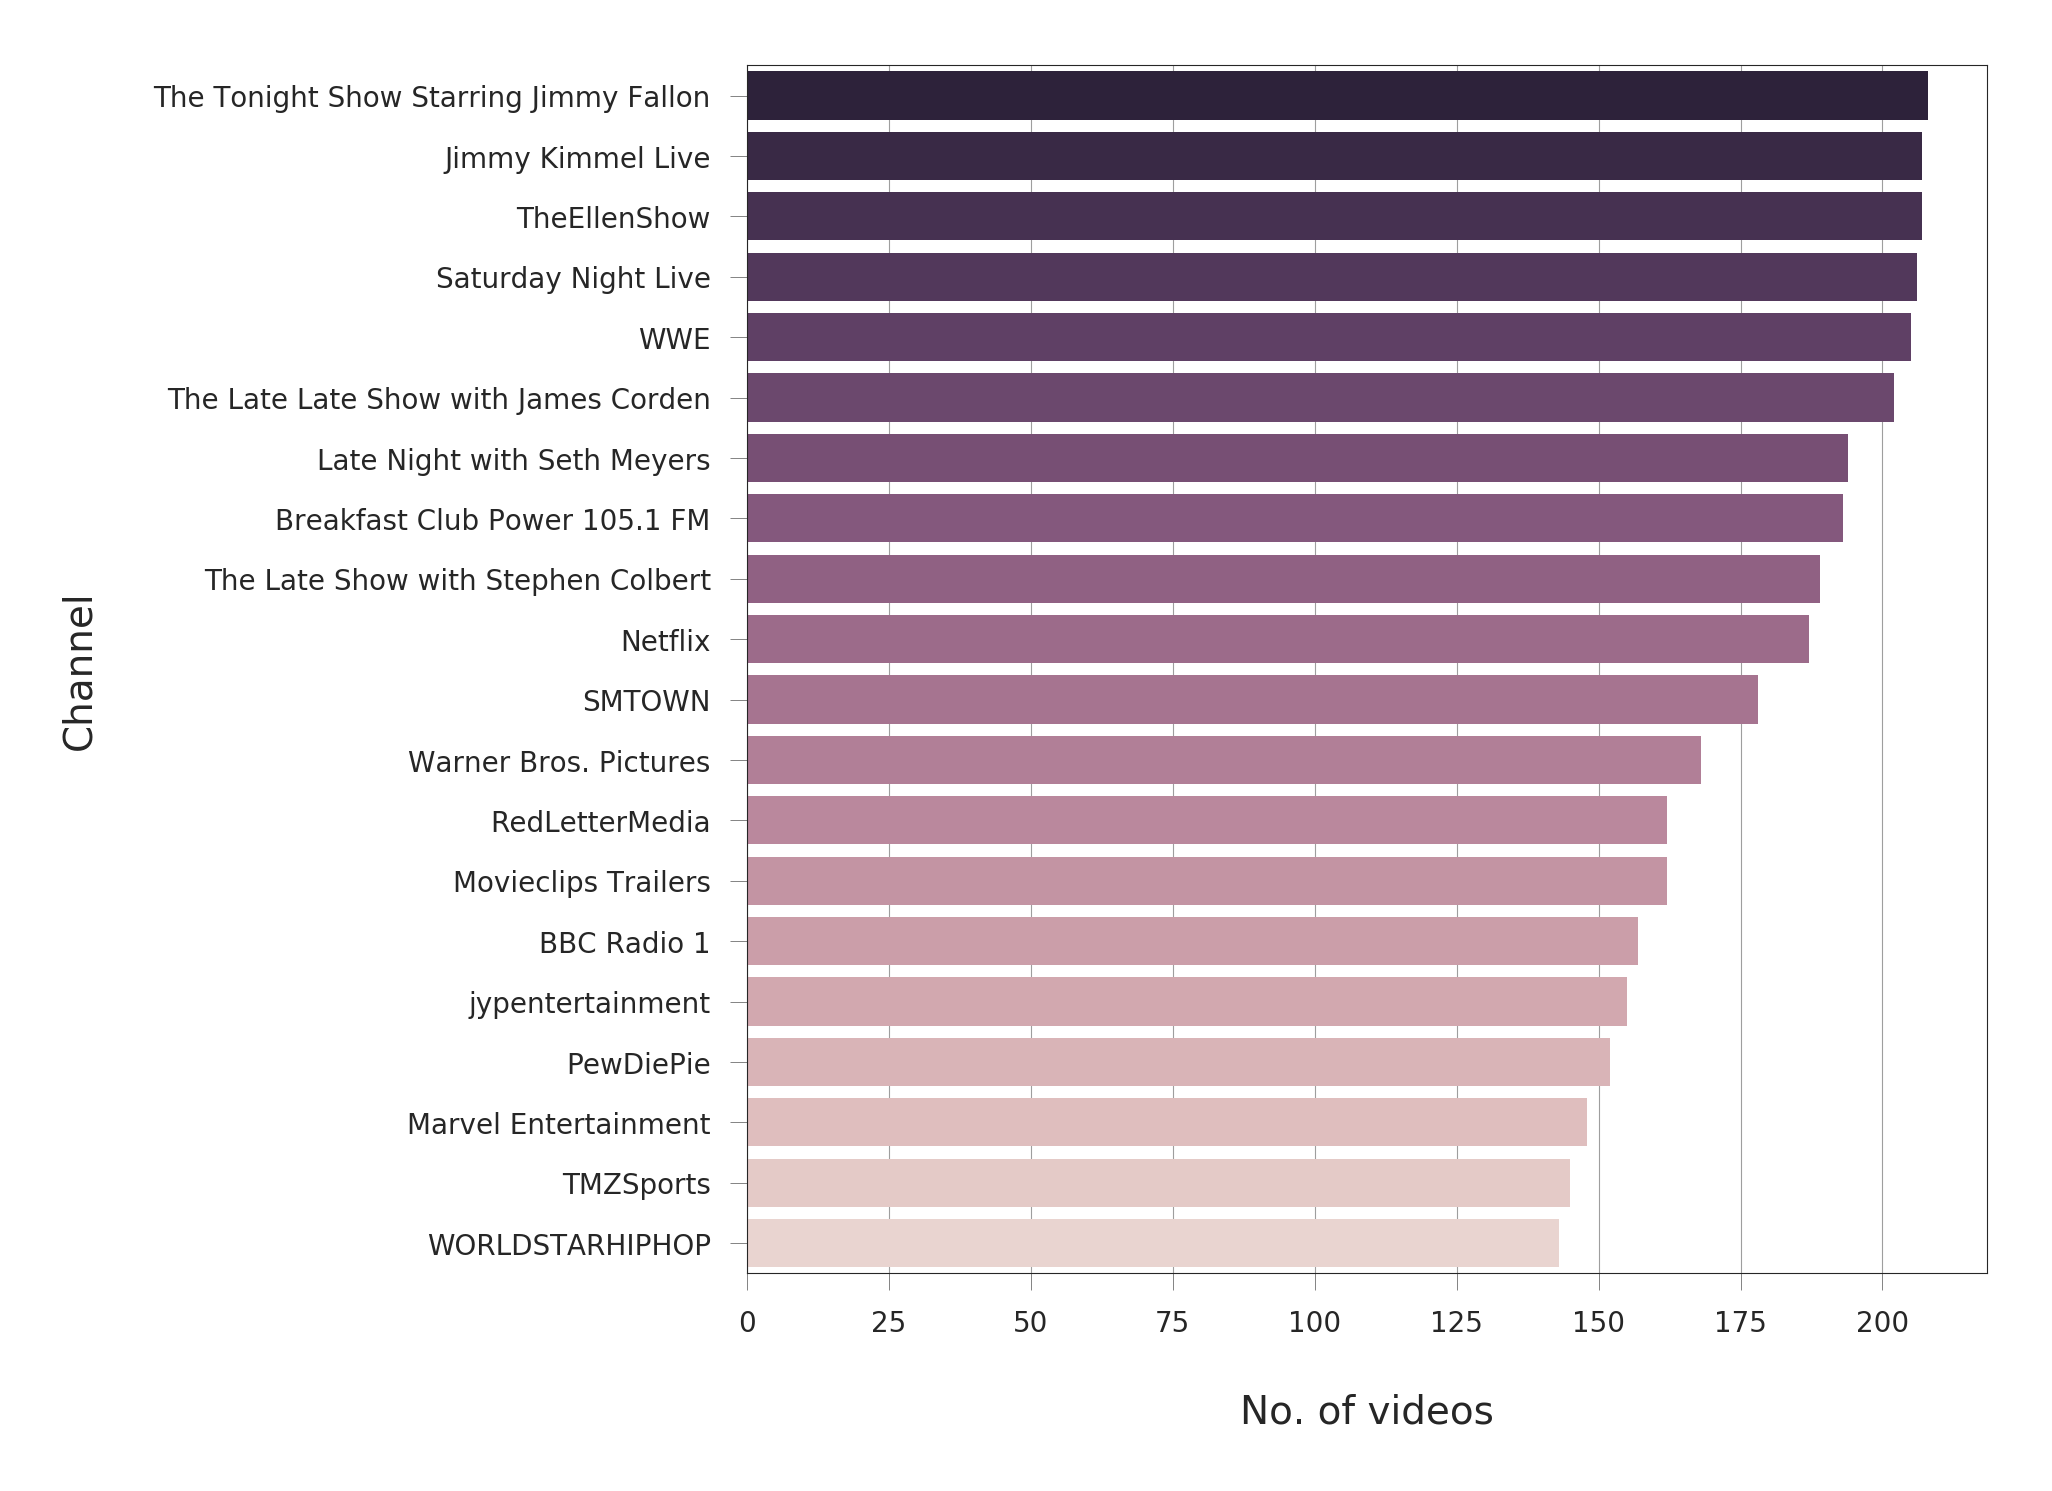

In [44]:
cdf = df.groupby("channel_title").size().reset_index(name="video_count") \
    .sort_values("video_count", ascending=False).head(20)

fig, ax = plt.subplots(figsize=(8,8))
sns.barplot(x="video_count", y="channel_title", data=cdf, palette=sns.cubehelix_palette(n_colors=20, reverse=True), ax=ax)
ax.set(xlabel="No. of videos", ylabel="Channel");

In [45]:
title_words = list(df["title"].apply(lambda x: x.split()))
title_words = [x for y in title_words for x in y]
Counter(title_words).most_common(5)

[('-', 17845),
 ('|', 8728),
 ('The', 6012),
 ('Video)', 3757),
 ('(Official', 3526)]

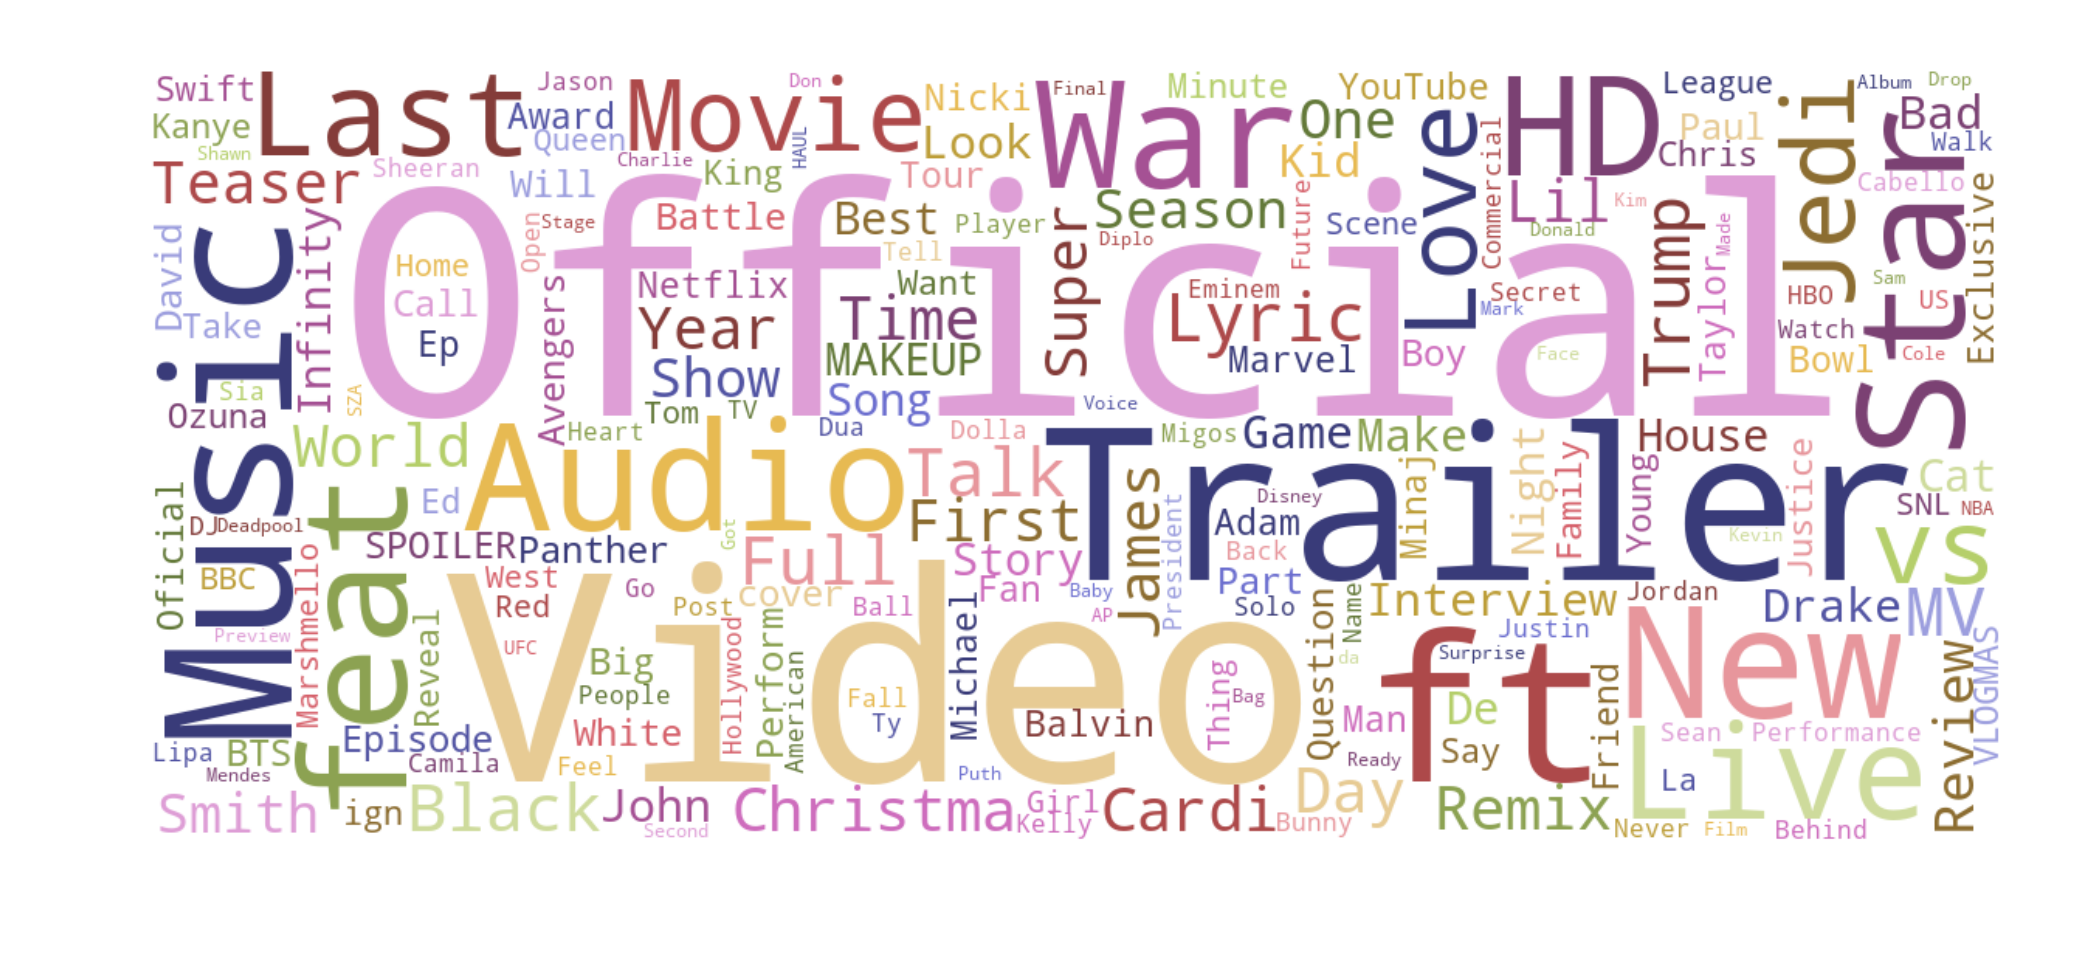

In [46]:
wc = wordcloud.WordCloud(width=1200, height=500, 
                         collocations=False, background_color="white", 
                         colormap="tab20b").generate(" ".join(title_words))
plt.figure(figsize=(12,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off");

In [47]:
grouped = df.groupby("video_id")
groups = []
wanted_groups = []
for key, item in grouped:
    groups.append(grouped.get_group(key))

for g in groups:
    if len(g['title'].unique()) != 1:
        wanted_groups.append(g)

wanted_groups[0]

trending_date                                              title  \
video_id                                                                       
0SLu6i6Rm2g    2018-01-20  Tyron Woodley Says Things Got Real With Conor ...   
0SLu6i6Rm2g    2018-01-21  Tyron Woodley Says Things Got Real With Conor ...   
0SLu6i6Rm2g    2018-01-22  Tyron Woodley Says Things Got Real With Conor ...   
0SLu6i6Rm2g    2018-01-23  Tyron Woodley Explains Why Cormier REALLY Hate...   
0SLu6i6Rm2g    2018-01-24  Tyron Woodley Explains Why Cormier REALLY Hate...   
0SLu6i6Rm2g    2018-01-25  Tyron Woodley Explains Why Cormier REALLY Hate...   

            channel_title category_id        publish_time  \
video_id                                                    
0SLu6i6Rm2g     TMZSports          17 2018-01-20 00:01:44   
0SLu6i6Rm2g     TMZSports          17 2018-01-20 00:01:44   
0SLu6i6Rm2g     TMZSports          17 2018-01-20 00:01:44   
0SLu6i6Rm2g     TMZSports          17 2018-01-20 00:01:44   
0SLu6i6Rm2g     TMZSports          17 2018-01-20 00:01:44   
0SLu6i6Rm2g     TMZSports          17 2018-01-20 00:01:44   

                                                          tags  views  likes  \
video_id                                                                       
0SLu6i6Rm2g  TMZ|"TMZ Sports"|"TMZ Sports Channel"|"TMZ 201...  15235    211   
0SLu6i6Rm2g  TMZ|"TMZ Sports"|"TMZ Sports Channel"|"TMZ 201...  32983    317   
0SLu6i6Rm2g  TMZ|"TMZ Sports"|"TMZ Sports Channel"|"TMZ 201...  43976    345   
0SLu6i6Rm2g  TMZ|"TMZ Sports"|"TMZ Sports Channel"|"TMZ 201...  54029    391   
0SLu6i6Rm2g  TMZ|"TMZ Sports"|"TMZ Sports Channel"|"TMZ 201...  63764    437   
0SLu6i6Rm2g  TMZ|"TMZ Sports"|"TMZ Sports Channel"|"TMZ 201...  73474    503   

             dislikes  comment_count          ...          category_name  \
video_id                                      ...                          
0SLu6i6Rm2g        56            126          ...                 Sports   
0SLu6i6Rm2g        90            180          ...                 Sports   
0SLu6i6Rm2g       114            208          ...                 Sports   
0SLu6i6Rm2g       124            227          ...                 Sports   
0SLu6i6Rm2g       142            251          ...                 Sports   
0SLu6i6Rm2g       172            289          ...                 Sports   

             likes_log  views_log  dislikes_log comment_log like_rate  \
video_id                                                                
0SLu6i6Rm2g       5.36       9.63          4.04        4.84      1.38   
0SLu6i6Rm2g       5.76      10.40          4.51        5.20      0.96   
0SLu6i6Rm2g       5.85      10.69          4.74        5.34      0.78   
0SLu6i6Rm2g       5.97      10.90          4.83        5.43      0.72   
0SLu6i6Rm2g       6.08      11.06          4.96        5.53      0.69   
0SLu6i6Rm2g       6.22      11.20          5.15        5.67      0.68   

             dislike_rate  comment_rate  title_length  contains_capitalized  
video_id                                                                     
0SLu6i6Rm2g          0.37          0.83            92                  True  
0SLu6i6Rm2g          0.27          0.55            92                  True  
0SLu6i6Rm2g          0.26          0.47            92                  True  
0SLu6i6Rm2g          0.23          0.42            95                  True  
0SLu6i6Rm2g          0.22          0.39            95                  True  
0SLu6i6Rm2g          0.23          0.39            95                  True  

[6 rows x 25 columns]

In [48]:
plt.figure(figsize=(18,16))

df.likes.plot(kind = 'line', color = 'g',label = 'Likes',linewidth=1,alpha = 0.5,grid = True,linestyle = ':')
df.comment_count.plot(color = 'r',label = 'Comment Counts',linewidth=1, alpha = 0.5,grid = True,linestyle = '-.')
plt.legend(loc='upper right')   
plt.xlabel('x axis')        
plt.ylabel('y axis')
plt.title('Line Plot')      
plt.show();

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
